# _Project Layout_
* Literature review: Researching the medium blogs with relative work done by people (summarized and kept in repo)
 ### Phase:1
> #### Data exploration
> #### Basic plotting
 ### Phase:2
> #### Feature engineering
> * Percent Change
> * Moving Average
> * Daily Return
## Advanced feature engineering: tsfresh 
> * Auto feature engineering package which creates around 800 statistically significant features 
## Modeling
> ### Baseline model : Logisitic Regression 


# _Let's Begin_

## Phase:1 Data Exploration
> #### Here aim is to explore data to understand the dimension of it



#### Importing few packages that I assume would be required for basic data exploration and manipulation

In [2532]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.layouts import column
from bokeh.plotting import figure,output_file,show,output_notebook
%matplotlib inline
import math
import statistics


from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
plt.style.use('seaborn')
import seaborn as sns

from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import make_forecasting_frame
from sklearn.ensemble import AdaBoostRegressor
from tsfresh.utilities.dataframe_functions import impute

# Fix needed to pandas datareader
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os;

In [2854]:
# Loading the datasaet
binance=pd.read_csv("bnb_btc_1H_binance.csv")
binance['date'] = pd.to_datetime(binance['time_period_start'])

In [2855]:
binance.head(1)

,time_period_start,price_open,price_high,price_low,price_close,volume_traded,date
0,1/1/18 0:00,0.000623,0.000625,0.000614,0.000618,131421.0,2018-01-01


## Step 1: create lagged dependent variable

In [2856]:
binance['price_6h'] = binance['price_close'].shift(-6)
binance['date_6h'] = binance['date'].shift(-6)

In [2857]:
binance.head(12)

,time_period_start,price_open,price_high,price_low,price_close,volume_traded,date,price_6h,date_6h
0,1/1/18 0:00,0.000623,0.000625,0.000614,0.000618,131421.0,2018-01-01 00:00:00,0.000621,2018-01-01 06:00:00
1,1/1/18 1:00,0.000618,0.000625,0.000611,0.000622,91119.0,2018-01-01 01:00:00,0.000617,2018-01-01 07:00:00
2,1/1/18 2:00,0.000622,0.000625,0.000620,0.000622,101296.0,2018-01-01 02:00:00,0.000621,2018-01-01 08:00:00
3,1/1/18 3:00,0.000622,0.000624,0.000619,0.000622,84276.0,2018-01-01 03:00:00,0.000620,2018-01-01 09:00:00
4,1/1/18 4:00,0.000622,0.000628,0.000622,0.000625,103000.0,2018-01-01 04:00:00,0.000618,2018-01-01 10:00:00
5,1/1/18 5:00,0.000624,0.000629,0.000622,0.000626,89419.0,2018-01-01 05:00:00,0.000619,2018-01-01 11:00:00
6,1/1/18 6:00,0.000626,0.000629,0.000615,0.000621,102947.0,2018-01-01 06:00:00,0.000623,2018-01-01 12:00:00
7,1/1/18 7:00,0.000621,0.000628,0.000613,0.000617,209044.0,2018-01-01 07:00:00,0.000614,2018-01-01 13:00:00
8,1/1/18 8:00,0.000616,0.000625,0.000616,0.000621,73183.0,2018-01-01 08:00:00,0.000614,2018-01-01 14:00:00
9,1/1/18 9:00,0.000620,0.000622,0.000616,0.000620,72248.0,2018-01-01 09:00:00,0.000613,2018-01-01 15:00:00


In [2850]:
binance.set_index('date', inplace=True)

In [2852]:
binance.head(12)

,time_period_start,price_open,price_high,price_low,price_close,volume_traded
date,,,,,,
2018-01-01 00:00:00,1/1/18 0:00,0.000623,0.000625,0.000614,0.000618,131421.0
2018-01-01 01:00:00,1/1/18 1:00,0.000618,0.000625,0.000611,0.000622,91119.0
2018-01-01 02:00:00,1/1/18 2:00,0.000622,0.000625,0.000620,0.000622,101296.0
2018-01-01 03:00:00,1/1/18 3:00,0.000622,0.000624,0.000619,0.000622,84276.0
2018-01-01 04:00:00,1/1/18 4:00,0.000622,0.000628,0.000622,0.000625,103000.0
2018-01-01 05:00:00,1/1/18 5:00,0.000624,0.000629,0.000622,0.000626,89419.0
2018-01-01 06:00:00,1/1/18 6:00,0.000626,0.000629,0.000615,0.000621,102947.0
2018-01-01 07:00:00,1/1/18 7:00,0.000621,0.000628,0.000613,0.000617,209044.0
2018-01-01 08:00:00,1/1/18 8:00,0.000616,0.000625,0.000616,0.000621,73183.0


In [2622]:
unique_dates = binance.index.unique()
unique_dates.shape

(8773,)

In [2623]:

tseries = []

count = 0
for date in unique_dates:
    start = date
    end = binance.loc[date]['date_6h']
    
    
    print(f"id = {count} -> Start: {start}, end: {end}")
    #count = count+1
    
    
    tmp = binance.loc[start:end].copy()
    tmp['id'] = count
    
    tseries.append(tmp.reset_index())
    
    count = count+1
    
    if count == 8773:
        break
    
    
tseries = pd.concat(tseries, axis=0, ignore_index=True)

id = 0 -> Start: 2018-01-01 00:00:00, end: 2018-01-01 06:00:00
id = 1 -> Start: 2018-01-01 01:00:00, end: 2018-01-01 07:00:00
id = 2 -> Start: 2018-01-01 02:00:00, end: 2018-01-01 08:00:00
id = 3 -> Start: 2018-01-01 03:00:00, end: 2018-01-01 09:00:00
id = 4 -> Start: 2018-01-01 04:00:00, end: 2018-01-01 10:00:00
id = 5 -> Start: 2018-01-01 05:00:00, end: 2018-01-01 11:00:00
id = 6 -> Start: 2018-01-01 06:00:00, end: 2018-01-01 12:00:00
id = 7 -> Start: 2018-01-01 07:00:00, end: 2018-01-01 13:00:00
id = 8 -> Start: 2018-01-01 08:00:00, end: 2018-01-01 14:00:00
id = 9 -> Start: 2018-01-01 09:00:00, end: 2018-01-01 15:00:00
id = 10 -> Start: 2018-01-01 10:00:00, end: 2018-01-01 16:00:00
id = 11 -> Start: 2018-01-01 11:00:00, end: 2018-01-01 17:00:00
id = 12 -> Start: 2018-01-01 12:00:00, end: 2018-01-01 18:00:00
id = 13 -> Start: 2018-01-01 13:00:00, end: 2018-01-01 19:00:00
id = 14 -> Start: 2018-01-01 14:00:00, end: 2018-01-01 20:00:00
id = 15 -> Start: 2018-01-01 15:00:00, end: 2018-0

id = 174 -> Start: 2018-01-08 06:00:00, end: 2018-01-08 12:00:00
id = 175 -> Start: 2018-01-08 07:00:00, end: 2018-01-08 13:00:00
id = 176 -> Start: 2018-01-08 08:00:00, end: 2018-01-08 14:00:00
id = 177 -> Start: 2018-01-08 09:00:00, end: 2018-01-08 15:00:00
id = 178 -> Start: 2018-01-08 10:00:00, end: 2018-01-08 16:00:00
id = 179 -> Start: 2018-01-08 11:00:00, end: 2018-01-08 17:00:00
id = 180 -> Start: 2018-01-08 12:00:00, end: 2018-01-08 18:00:00
id = 181 -> Start: 2018-01-08 13:00:00, end: 2018-01-08 19:00:00
id = 182 -> Start: 2018-01-08 14:00:00, end: 2018-01-08 20:00:00
id = 183 -> Start: 2018-01-08 15:00:00, end: 2018-01-08 21:00:00
id = 184 -> Start: 2018-01-08 16:00:00, end: 2018-01-08 22:00:00
id = 185 -> Start: 2018-01-08 17:00:00, end: 2018-01-08 23:00:00
id = 186 -> Start: 2018-01-08 18:00:00, end: 2018-01-09 00:00:00
id = 187 -> Start: 2018-01-08 19:00:00, end: 2018-01-09 01:00:00
id = 188 -> Start: 2018-01-08 20:00:00, end: 2018-01-09 02:00:00
id = 189 -> Start: 2018-0

id = 333 -> Start: 2018-01-14 21:00:00, end: 2018-01-15 03:00:00
id = 334 -> Start: 2018-01-14 22:00:00, end: 2018-01-15 04:00:00
id = 335 -> Start: 2018-01-14 23:00:00, end: 2018-01-15 05:00:00
id = 336 -> Start: 2018-01-15 00:00:00, end: 2018-01-15 06:00:00
id = 337 -> Start: 2018-01-15 01:00:00, end: 2018-01-15 07:00:00
id = 338 -> Start: 2018-01-15 02:00:00, end: 2018-01-15 08:00:00
id = 339 -> Start: 2018-01-15 03:00:00, end: 2018-01-15 09:00:00
id = 340 -> Start: 2018-01-15 04:00:00, end: 2018-01-15 10:00:00
id = 341 -> Start: 2018-01-15 05:00:00, end: 2018-01-15 11:00:00
id = 342 -> Start: 2018-01-15 06:00:00, end: 2018-01-15 12:00:00
id = 343 -> Start: 2018-01-15 07:00:00, end: 2018-01-15 13:00:00
id = 344 -> Start: 2018-01-15 08:00:00, end: 2018-01-15 14:00:00
id = 345 -> Start: 2018-01-15 09:00:00, end: 2018-01-15 15:00:00
id = 346 -> Start: 2018-01-15 10:00:00, end: 2018-01-15 16:00:00
id = 347 -> Start: 2018-01-15 11:00:00, end: 2018-01-15 17:00:00
id = 348 -> Start: 2018-0

id = 513 -> Start: 2018-01-22 09:00:00, end: 2018-01-22 15:00:00
id = 514 -> Start: 2018-01-22 10:00:00, end: 2018-01-22 16:00:00
id = 515 -> Start: 2018-01-22 11:00:00, end: 2018-01-22 17:00:00
id = 516 -> Start: 2018-01-22 12:00:00, end: 2018-01-22 18:00:00
id = 517 -> Start: 2018-01-22 13:00:00, end: 2018-01-22 19:00:00
id = 518 -> Start: 2018-01-22 14:00:00, end: 2018-01-22 20:00:00
id = 519 -> Start: 2018-01-22 15:00:00, end: 2018-01-22 21:00:00
id = 520 -> Start: 2018-01-22 16:00:00, end: 2018-01-22 22:00:00
id = 521 -> Start: 2018-01-22 17:00:00, end: 2018-01-22 23:00:00
id = 522 -> Start: 2018-01-22 18:00:00, end: 2018-01-23 00:00:00
id = 523 -> Start: 2018-01-22 19:00:00, end: 2018-01-23 01:00:00
id = 524 -> Start: 2018-01-22 20:00:00, end: 2018-01-23 02:00:00
id = 525 -> Start: 2018-01-22 21:00:00, end: 2018-01-23 03:00:00
id = 526 -> Start: 2018-01-22 22:00:00, end: 2018-01-23 04:00:00
id = 527 -> Start: 2018-01-22 23:00:00, end: 2018-01-23 05:00:00
id = 528 -> Start: 2018-0

id = 640 -> Start: 2018-01-27 16:00:00, end: 2018-01-27 22:00:00
id = 641 -> Start: 2018-01-27 17:00:00, end: 2018-01-27 23:00:00
id = 642 -> Start: 2018-01-27 18:00:00, end: 2018-01-28 00:00:00
id = 643 -> Start: 2018-01-27 19:00:00, end: 2018-01-28 01:00:00
id = 644 -> Start: 2018-01-27 20:00:00, end: 2018-01-28 02:00:00
id = 645 -> Start: 2018-01-27 21:00:00, end: 2018-01-28 03:00:00
id = 646 -> Start: 2018-01-27 22:00:00, end: 2018-01-28 04:00:00
id = 647 -> Start: 2018-01-27 23:00:00, end: 2018-01-28 05:00:00
id = 648 -> Start: 2018-01-28 00:00:00, end: 2018-01-28 06:00:00
id = 649 -> Start: 2018-01-28 01:00:00, end: 2018-01-28 07:00:00
id = 650 -> Start: 2018-01-28 02:00:00, end: 2018-01-28 08:00:00
id = 651 -> Start: 2018-01-28 03:00:00, end: 2018-01-28 09:00:00
id = 652 -> Start: 2018-01-28 04:00:00, end: 2018-01-28 10:00:00
id = 653 -> Start: 2018-01-28 05:00:00, end: 2018-01-28 11:00:00
id = 654 -> Start: 2018-01-28 06:00:00, end: 2018-01-28 12:00:00
id = 655 -> Start: 2018-0

id = 769 -> Start: 2018-02-02 01:00:00, end: 2018-02-02 07:00:00
id = 770 -> Start: 2018-02-02 02:00:00, end: 2018-02-02 08:00:00
id = 771 -> Start: 2018-02-02 03:00:00, end: 2018-02-02 09:00:00
id = 772 -> Start: 2018-02-02 04:00:00, end: 2018-02-02 10:00:00
id = 773 -> Start: 2018-02-02 05:00:00, end: 2018-02-02 11:00:00
id = 774 -> Start: 2018-02-02 06:00:00, end: 2018-02-02 12:00:00
id = 775 -> Start: 2018-02-02 07:00:00, end: 2018-02-02 13:00:00
id = 776 -> Start: 2018-02-02 08:00:00, end: 2018-02-02 14:00:00
id = 777 -> Start: 2018-02-02 09:00:00, end: 2018-02-02 15:00:00
id = 778 -> Start: 2018-02-02 10:00:00, end: 2018-02-02 16:00:00
id = 779 -> Start: 2018-02-02 11:00:00, end: 2018-02-02 17:00:00
id = 780 -> Start: 2018-02-02 12:00:00, end: 2018-02-02 18:00:00
id = 781 -> Start: 2018-02-02 13:00:00, end: 2018-02-02 19:00:00
id = 782 -> Start: 2018-02-02 14:00:00, end: 2018-02-02 20:00:00
id = 783 -> Start: 2018-02-02 15:00:00, end: 2018-02-02 21:00:00
id = 784 -> Start: 2018-0

id = 900 -> Start: 2018-02-07 12:00:00, end: 2018-02-07 18:00:00
id = 901 -> Start: 2018-02-07 13:00:00, end: 2018-02-07 19:00:00
id = 902 -> Start: 2018-02-07 14:00:00, end: 2018-02-07 20:00:00
id = 903 -> Start: 2018-02-07 15:00:00, end: 2018-02-07 21:00:00
id = 904 -> Start: 2018-02-07 16:00:00, end: 2018-02-07 22:00:00
id = 905 -> Start: 2018-02-07 17:00:00, end: 2018-02-07 23:00:00
id = 906 -> Start: 2018-02-07 18:00:00, end: 2018-02-08 00:00:00
id = 907 -> Start: 2018-02-07 19:00:00, end: 2018-02-08 01:00:00
id = 908 -> Start: 2018-02-07 20:00:00, end: 2018-02-08 02:00:00
id = 909 -> Start: 2018-02-07 21:00:00, end: 2018-02-08 03:00:00
id = 910 -> Start: 2018-02-07 22:00:00, end: 2018-02-08 04:00:00
id = 911 -> Start: 2018-02-07 23:00:00, end: 2018-02-08 05:00:00
id = 912 -> Start: 2018-02-08 00:00:00, end: 2018-02-08 06:00:00
id = 913 -> Start: 2018-02-08 01:00:00, end: 2018-02-08 07:00:00
id = 914 -> Start: 2018-02-08 02:00:00, end: 2018-02-08 08:00:00
id = 915 -> Start: 2018-0

id = 1028 -> Start: 2018-02-12 20:00:00, end: 2018-02-13 02:00:00
id = 1029 -> Start: 2018-02-12 21:00:00, end: 2018-02-13 03:00:00
id = 1030 -> Start: 2018-02-12 22:00:00, end: 2018-02-13 04:00:00
id = 1031 -> Start: 2018-02-12 23:00:00, end: 2018-02-13 05:00:00
id = 1032 -> Start: 2018-02-13 00:00:00, end: 2018-02-13 06:00:00
id = 1033 -> Start: 2018-02-13 01:00:00, end: 2018-02-13 07:00:00
id = 1034 -> Start: 2018-02-13 02:00:00, end: 2018-02-13 08:00:00
id = 1035 -> Start: 2018-02-13 03:00:00, end: 2018-02-13 09:00:00
id = 1036 -> Start: 2018-02-13 04:00:00, end: 2018-02-13 10:00:00
id = 1037 -> Start: 2018-02-13 05:00:00, end: 2018-02-13 11:00:00
id = 1038 -> Start: 2018-02-13 06:00:00, end: 2018-02-13 12:00:00
id = 1039 -> Start: 2018-02-13 07:00:00, end: 2018-02-13 13:00:00
id = 1040 -> Start: 2018-02-13 08:00:00, end: 2018-02-13 14:00:00
id = 1041 -> Start: 2018-02-13 09:00:00, end: 2018-02-13 15:00:00
id = 1042 -> Start: 2018-02-13 10:00:00, end: 2018-02-13 16:00:00
id = 1043 

id = 1200 -> Start: 2018-02-20 00:00:00, end: 2018-02-20 06:00:00
id = 1201 -> Start: 2018-02-20 01:00:00, end: 2018-02-20 07:00:00
id = 1202 -> Start: 2018-02-20 02:00:00, end: 2018-02-20 08:00:00
id = 1203 -> Start: 2018-02-20 03:00:00, end: 2018-02-20 09:00:00
id = 1204 -> Start: 2018-02-20 04:00:00, end: 2018-02-20 10:00:00
id = 1205 -> Start: 2018-02-20 05:00:00, end: 2018-02-20 11:00:00
id = 1206 -> Start: 2018-02-20 06:00:00, end: 2018-02-20 12:00:00
id = 1207 -> Start: 2018-02-20 07:00:00, end: 2018-02-20 13:00:00
id = 1208 -> Start: 2018-02-20 08:00:00, end: 2018-02-20 14:00:00
id = 1209 -> Start: 2018-02-20 09:00:00, end: 2018-02-20 15:00:00
id = 1210 -> Start: 2018-02-20 10:00:00, end: 2018-02-20 16:00:00
id = 1211 -> Start: 2018-02-20 11:00:00, end: 2018-02-20 17:00:00
id = 1212 -> Start: 2018-02-20 12:00:00, end: 2018-02-20 18:00:00
id = 1213 -> Start: 2018-02-20 13:00:00, end: 2018-02-20 19:00:00
id = 1214 -> Start: 2018-02-20 14:00:00, end: 2018-02-20 20:00:00
id = 1215 

id = 1376 -> Start: 2018-02-27 08:00:00, end: 2018-02-27 14:00:00
id = 1377 -> Start: 2018-02-27 09:00:00, end: 2018-02-27 15:00:00
id = 1378 -> Start: 2018-02-27 10:00:00, end: 2018-02-27 16:00:00
id = 1379 -> Start: 2018-02-27 11:00:00, end: 2018-02-27 17:00:00
id = 1380 -> Start: 2018-02-27 12:00:00, end: 2018-02-27 18:00:00
id = 1381 -> Start: 2018-02-27 13:00:00, end: 2018-02-27 19:00:00
id = 1382 -> Start: 2018-02-27 14:00:00, end: 2018-02-27 20:00:00
id = 1383 -> Start: 2018-02-27 15:00:00, end: 2018-02-27 21:00:00
id = 1384 -> Start: 2018-02-27 16:00:00, end: 2018-02-27 22:00:00
id = 1385 -> Start: 2018-02-27 17:00:00, end: 2018-02-27 23:00:00
id = 1386 -> Start: 2018-02-27 18:00:00, end: 2018-02-28 00:00:00
id = 1387 -> Start: 2018-02-27 19:00:00, end: 2018-02-28 01:00:00
id = 1388 -> Start: 2018-02-27 20:00:00, end: 2018-02-28 02:00:00
id = 1389 -> Start: 2018-02-27 21:00:00, end: 2018-02-28 03:00:00
id = 1390 -> Start: 2018-02-27 22:00:00, end: 2018-02-28 04:00:00
id = 1391 

id = 1503 -> Start: 2018-03-04 15:00:00, end: 2018-03-04 21:00:00
id = 1504 -> Start: 2018-03-04 16:00:00, end: 2018-03-04 22:00:00
id = 1505 -> Start: 2018-03-04 17:00:00, end: 2018-03-04 23:00:00
id = 1506 -> Start: 2018-03-04 18:00:00, end: 2018-03-05 00:00:00
id = 1507 -> Start: 2018-03-04 19:00:00, end: 2018-03-05 01:00:00
id = 1508 -> Start: 2018-03-04 20:00:00, end: 2018-03-05 02:00:00
id = 1509 -> Start: 2018-03-04 21:00:00, end: 2018-03-05 03:00:00
id = 1510 -> Start: 2018-03-04 22:00:00, end: 2018-03-05 04:00:00
id = 1511 -> Start: 2018-03-04 23:00:00, end: 2018-03-05 05:00:00
id = 1512 -> Start: 2018-03-05 00:00:00, end: 2018-03-05 06:00:00
id = 1513 -> Start: 2018-03-05 01:00:00, end: 2018-03-05 07:00:00
id = 1514 -> Start: 2018-03-05 02:00:00, end: 2018-03-05 08:00:00
id = 1515 -> Start: 2018-03-05 03:00:00, end: 2018-03-05 09:00:00
id = 1516 -> Start: 2018-03-05 04:00:00, end: 2018-03-05 10:00:00
id = 1517 -> Start: 2018-03-05 05:00:00, end: 2018-03-05 11:00:00
id = 1518 

id = 1674 -> Start: 2018-03-11 18:00:00, end: 2018-03-12 00:00:00
id = 1675 -> Start: 2018-03-11 19:00:00, end: 2018-03-12 01:00:00
id = 1676 -> Start: 2018-03-11 20:00:00, end: 2018-03-12 02:00:00
id = 1677 -> Start: 2018-03-11 21:00:00, end: 2018-03-12 03:00:00
id = 1678 -> Start: 2018-03-11 22:00:00, end: 2018-03-12 04:00:00
id = 1679 -> Start: 2018-03-11 23:00:00, end: 2018-03-12 05:00:00
id = 1680 -> Start: 2018-03-12 00:00:00, end: 2018-03-12 06:00:00
id = 1681 -> Start: 2018-03-12 01:00:00, end: 2018-03-12 07:00:00
id = 1682 -> Start: 2018-03-12 02:00:00, end: 2018-03-12 08:00:00
id = 1683 -> Start: 2018-03-12 03:00:00, end: 2018-03-12 09:00:00
id = 1684 -> Start: 2018-03-12 04:00:00, end: 2018-03-12 10:00:00
id = 1685 -> Start: 2018-03-12 05:00:00, end: 2018-03-12 11:00:00
id = 1686 -> Start: 2018-03-12 06:00:00, end: 2018-03-12 12:00:00
id = 1687 -> Start: 2018-03-12 07:00:00, end: 2018-03-12 13:00:00
id = 1688 -> Start: 2018-03-12 08:00:00, end: 2018-03-12 14:00:00
id = 1689 

id = 1805 -> Start: 2018-03-17 05:00:00, end: 2018-03-17 11:00:00
id = 1806 -> Start: 2018-03-17 06:00:00, end: 2018-03-17 12:00:00
id = 1807 -> Start: 2018-03-17 07:00:00, end: 2018-03-17 13:00:00
id = 1808 -> Start: 2018-03-17 08:00:00, end: 2018-03-17 14:00:00
id = 1809 -> Start: 2018-03-17 09:00:00, end: 2018-03-17 15:00:00
id = 1810 -> Start: 2018-03-17 10:00:00, end: 2018-03-17 16:00:00
id = 1811 -> Start: 2018-03-17 11:00:00, end: 2018-03-17 17:00:00
id = 1812 -> Start: 2018-03-17 12:00:00, end: 2018-03-17 18:00:00
id = 1813 -> Start: 2018-03-17 13:00:00, end: 2018-03-17 19:00:00
id = 1814 -> Start: 2018-03-17 14:00:00, end: 2018-03-17 20:00:00
id = 1815 -> Start: 2018-03-17 15:00:00, end: 2018-03-17 21:00:00
id = 1816 -> Start: 2018-03-17 16:00:00, end: 2018-03-17 22:00:00
id = 1817 -> Start: 2018-03-17 17:00:00, end: 2018-03-17 23:00:00
id = 1818 -> Start: 2018-03-17 18:00:00, end: 2018-03-18 00:00:00
id = 1819 -> Start: 2018-03-17 19:00:00, end: 2018-03-18 01:00:00
id = 1820 

id = 1956 -> Start: 2018-03-23 12:00:00, end: 2018-03-23 18:00:00
id = 1957 -> Start: 2018-03-23 13:00:00, end: 2018-03-23 19:00:00
id = 1958 -> Start: 2018-03-23 14:00:00, end: 2018-03-23 20:00:00
id = 1959 -> Start: 2018-03-23 15:00:00, end: 2018-03-23 21:00:00
id = 1960 -> Start: 2018-03-23 16:00:00, end: 2018-03-23 22:00:00
id = 1961 -> Start: 2018-03-23 17:00:00, end: 2018-03-23 23:00:00
id = 1962 -> Start: 2018-03-23 18:00:00, end: 2018-03-24 00:00:00
id = 1963 -> Start: 2018-03-23 19:00:00, end: 2018-03-24 01:00:00
id = 1964 -> Start: 2018-03-23 20:00:00, end: 2018-03-24 02:00:00
id = 1965 -> Start: 2018-03-23 21:00:00, end: 2018-03-24 03:00:00
id = 1966 -> Start: 2018-03-23 22:00:00, end: 2018-03-24 04:00:00
id = 1967 -> Start: 2018-03-23 23:00:00, end: 2018-03-24 05:00:00
id = 1968 -> Start: 2018-03-24 00:00:00, end: 2018-03-24 06:00:00
id = 1969 -> Start: 2018-03-24 01:00:00, end: 2018-03-24 07:00:00
id = 1970 -> Start: 2018-03-24 02:00:00, end: 2018-03-24 08:00:00
id = 1971 

id = 2106 -> Start: 2018-03-29 18:00:00, end: 2018-03-30 00:00:00
id = 2107 -> Start: 2018-03-29 19:00:00, end: 2018-03-30 01:00:00
id = 2108 -> Start: 2018-03-29 20:00:00, end: 2018-03-30 02:00:00
id = 2109 -> Start: 2018-03-29 21:00:00, end: 2018-03-30 03:00:00
id = 2110 -> Start: 2018-03-29 22:00:00, end: 2018-03-30 04:00:00
id = 2111 -> Start: 2018-03-29 23:00:00, end: 2018-03-30 05:00:00
id = 2112 -> Start: 2018-03-30 00:00:00, end: 2018-03-30 06:00:00
id = 2113 -> Start: 2018-03-30 01:00:00, end: 2018-03-30 07:00:00
id = 2114 -> Start: 2018-03-30 02:00:00, end: 2018-03-30 08:00:00
id = 2115 -> Start: 2018-03-30 03:00:00, end: 2018-03-30 09:00:00
id = 2116 -> Start: 2018-03-30 04:00:00, end: 2018-03-30 10:00:00
id = 2117 -> Start: 2018-03-30 05:00:00, end: 2018-03-30 11:00:00
id = 2118 -> Start: 2018-03-30 06:00:00, end: 2018-03-30 12:00:00
id = 2119 -> Start: 2018-03-30 07:00:00, end: 2018-03-30 13:00:00
id = 2120 -> Start: 2018-03-30 08:00:00, end: 2018-03-30 14:00:00
id = 2121 

id = 2255 -> Start: 2018-04-04 23:00:00, end: 2018-04-05 05:00:00
id = 2256 -> Start: 2018-04-05 00:00:00, end: 2018-04-05 06:00:00
id = 2257 -> Start: 2018-04-05 01:00:00, end: 2018-04-05 07:00:00
id = 2258 -> Start: 2018-04-05 02:00:00, end: 2018-04-05 08:00:00
id = 2259 -> Start: 2018-04-05 03:00:00, end: 2018-04-05 09:00:00
id = 2260 -> Start: 2018-04-05 04:00:00, end: 2018-04-05 10:00:00
id = 2261 -> Start: 2018-04-05 05:00:00, end: 2018-04-05 11:00:00
id = 2262 -> Start: 2018-04-05 06:00:00, end: 2018-04-05 12:00:00
id = 2263 -> Start: 2018-04-05 07:00:00, end: 2018-04-05 13:00:00
id = 2264 -> Start: 2018-04-05 08:00:00, end: 2018-04-05 14:00:00
id = 2265 -> Start: 2018-04-05 09:00:00, end: 2018-04-05 15:00:00
id = 2266 -> Start: 2018-04-05 10:00:00, end: 2018-04-05 16:00:00
id = 2267 -> Start: 2018-04-05 11:00:00, end: 2018-04-05 17:00:00
id = 2268 -> Start: 2018-04-05 12:00:00, end: 2018-04-05 18:00:00
id = 2269 -> Start: 2018-04-05 13:00:00, end: 2018-04-05 19:00:00
id = 2270 

id = 2402 -> Start: 2018-04-11 02:00:00, end: 2018-04-11 08:00:00
id = 2403 -> Start: 2018-04-11 03:00:00, end: 2018-04-11 09:00:00
id = 2404 -> Start: 2018-04-11 04:00:00, end: 2018-04-11 10:00:00
id = 2405 -> Start: 2018-04-11 05:00:00, end: 2018-04-11 11:00:00
id = 2406 -> Start: 2018-04-11 06:00:00, end: 2018-04-11 12:00:00
id = 2407 -> Start: 2018-04-11 07:00:00, end: 2018-04-11 13:00:00
id = 2408 -> Start: 2018-04-11 08:00:00, end: 2018-04-11 14:00:00
id = 2409 -> Start: 2018-04-11 09:00:00, end: 2018-04-11 15:00:00
id = 2410 -> Start: 2018-04-11 10:00:00, end: 2018-04-11 16:00:00
id = 2411 -> Start: 2018-04-11 11:00:00, end: 2018-04-11 17:00:00
id = 2412 -> Start: 2018-04-11 12:00:00, end: 2018-04-11 18:00:00
id = 2413 -> Start: 2018-04-11 13:00:00, end: 2018-04-11 19:00:00
id = 2414 -> Start: 2018-04-11 14:00:00, end: 2018-04-11 20:00:00
id = 2415 -> Start: 2018-04-11 15:00:00, end: 2018-04-11 21:00:00
id = 2416 -> Start: 2018-04-11 16:00:00, end: 2018-04-11 22:00:00
id = 2417 

id = 2541 -> Start: 2018-04-16 21:00:00, end: 2018-04-17 03:00:00
id = 2542 -> Start: 2018-04-16 22:00:00, end: 2018-04-17 04:00:00
id = 2543 -> Start: 2018-04-16 23:00:00, end: 2018-04-17 05:00:00
id = 2544 -> Start: 2018-04-17 00:00:00, end: 2018-04-17 06:00:00
id = 2545 -> Start: 2018-04-17 01:00:00, end: 2018-04-17 07:00:00
id = 2546 -> Start: 2018-04-17 02:00:00, end: 2018-04-17 08:00:00
id = 2547 -> Start: 2018-04-17 03:00:00, end: 2018-04-17 09:00:00
id = 2548 -> Start: 2018-04-17 04:00:00, end: 2018-04-17 10:00:00
id = 2549 -> Start: 2018-04-17 05:00:00, end: 2018-04-17 11:00:00
id = 2550 -> Start: 2018-04-17 06:00:00, end: 2018-04-17 12:00:00
id = 2551 -> Start: 2018-04-17 07:00:00, end: 2018-04-17 13:00:00
id = 2552 -> Start: 2018-04-17 08:00:00, end: 2018-04-17 14:00:00
id = 2553 -> Start: 2018-04-17 09:00:00, end: 2018-04-17 15:00:00
id = 2554 -> Start: 2018-04-17 10:00:00, end: 2018-04-17 16:00:00
id = 2555 -> Start: 2018-04-17 11:00:00, end: 2018-04-17 17:00:00
id = 2556 

id = 2686 -> Start: 2018-04-22 22:00:00, end: 2018-04-23 04:00:00
id = 2687 -> Start: 2018-04-22 23:00:00, end: 2018-04-23 05:00:00
id = 2688 -> Start: 2018-04-23 00:00:00, end: 2018-04-23 06:00:00
id = 2689 -> Start: 2018-04-23 01:00:00, end: 2018-04-23 07:00:00
id = 2690 -> Start: 2018-04-23 02:00:00, end: 2018-04-23 08:00:00
id = 2691 -> Start: 2018-04-23 03:00:00, end: 2018-04-23 09:00:00
id = 2692 -> Start: 2018-04-23 04:00:00, end: 2018-04-23 10:00:00
id = 2693 -> Start: 2018-04-23 05:00:00, end: 2018-04-23 11:00:00
id = 2694 -> Start: 2018-04-23 06:00:00, end: 2018-04-23 12:00:00
id = 2695 -> Start: 2018-04-23 07:00:00, end: 2018-04-23 13:00:00
id = 2696 -> Start: 2018-04-23 08:00:00, end: 2018-04-23 14:00:00
id = 2697 -> Start: 2018-04-23 09:00:00, end: 2018-04-23 15:00:00
id = 2698 -> Start: 2018-04-23 10:00:00, end: 2018-04-23 16:00:00
id = 2699 -> Start: 2018-04-23 11:00:00, end: 2018-04-23 17:00:00
id = 2700 -> Start: 2018-04-23 12:00:00, end: 2018-04-23 18:00:00
id = 2701 

id = 2825 -> Start: 2018-04-28 17:00:00, end: 2018-04-28 23:00:00
id = 2826 -> Start: 2018-04-28 18:00:00, end: 2018-04-29 00:00:00
id = 2827 -> Start: 2018-04-28 19:00:00, end: 2018-04-29 01:00:00
id = 2828 -> Start: 2018-04-28 20:00:00, end: 2018-04-29 02:00:00
id = 2829 -> Start: 2018-04-28 21:00:00, end: 2018-04-29 03:00:00
id = 2830 -> Start: 2018-04-28 22:00:00, end: 2018-04-29 04:00:00
id = 2831 -> Start: 2018-04-28 23:00:00, end: 2018-04-29 05:00:00
id = 2832 -> Start: 2018-04-29 00:00:00, end: 2018-04-29 06:00:00
id = 2833 -> Start: 2018-04-29 01:00:00, end: 2018-04-29 07:00:00
id = 2834 -> Start: 2018-04-29 02:00:00, end: 2018-04-29 08:00:00
id = 2835 -> Start: 2018-04-29 03:00:00, end: 2018-04-29 09:00:00
id = 2836 -> Start: 2018-04-29 04:00:00, end: 2018-04-29 10:00:00
id = 2837 -> Start: 2018-04-29 05:00:00, end: 2018-04-29 11:00:00
id = 2838 -> Start: 2018-04-29 06:00:00, end: 2018-04-29 12:00:00
id = 2839 -> Start: 2018-04-29 07:00:00, end: 2018-04-29 13:00:00
id = 2840 

id = 2962 -> Start: 2018-05-04 10:00:00, end: 2018-05-04 16:00:00
id = 2963 -> Start: 2018-05-04 11:00:00, end: 2018-05-04 17:00:00
id = 2964 -> Start: 2018-05-04 12:00:00, end: 2018-05-04 18:00:00
id = 2965 -> Start: 2018-05-04 13:00:00, end: 2018-05-04 19:00:00
id = 2966 -> Start: 2018-05-04 14:00:00, end: 2018-05-04 20:00:00
id = 2967 -> Start: 2018-05-04 15:00:00, end: 2018-05-04 21:00:00
id = 2968 -> Start: 2018-05-04 16:00:00, end: 2018-05-04 22:00:00
id = 2969 -> Start: 2018-05-04 17:00:00, end: 2018-05-04 23:00:00
id = 2970 -> Start: 2018-05-04 18:00:00, end: 2018-05-05 00:00:00
id = 2971 -> Start: 2018-05-04 19:00:00, end: 2018-05-05 01:00:00
id = 2972 -> Start: 2018-05-04 20:00:00, end: 2018-05-05 02:00:00
id = 2973 -> Start: 2018-05-04 21:00:00, end: 2018-05-05 03:00:00
id = 2974 -> Start: 2018-05-04 22:00:00, end: 2018-05-05 04:00:00
id = 2975 -> Start: 2018-05-04 23:00:00, end: 2018-05-05 05:00:00
id = 2976 -> Start: 2018-05-05 00:00:00, end: 2018-05-05 06:00:00
id = 2977 

id = 3103 -> Start: 2018-05-10 07:00:00, end: 2018-05-10 13:00:00
id = 3104 -> Start: 2018-05-10 08:00:00, end: 2018-05-10 14:00:00
id = 3105 -> Start: 2018-05-10 09:00:00, end: 2018-05-10 15:00:00
id = 3106 -> Start: 2018-05-10 10:00:00, end: 2018-05-10 16:00:00
id = 3107 -> Start: 2018-05-10 11:00:00, end: 2018-05-10 17:00:00
id = 3108 -> Start: 2018-05-10 12:00:00, end: 2018-05-10 18:00:00
id = 3109 -> Start: 2018-05-10 13:00:00, end: 2018-05-10 19:00:00
id = 3110 -> Start: 2018-05-10 14:00:00, end: 2018-05-10 20:00:00
id = 3111 -> Start: 2018-05-10 15:00:00, end: 2018-05-10 21:00:00
id = 3112 -> Start: 2018-05-10 16:00:00, end: 2018-05-10 22:00:00
id = 3113 -> Start: 2018-05-10 17:00:00, end: 2018-05-10 23:00:00
id = 3114 -> Start: 2018-05-10 18:00:00, end: 2018-05-11 00:00:00
id = 3115 -> Start: 2018-05-10 19:00:00, end: 2018-05-11 01:00:00
id = 3116 -> Start: 2018-05-10 20:00:00, end: 2018-05-11 02:00:00
id = 3117 -> Start: 2018-05-10 21:00:00, end: 2018-05-11 03:00:00
id = 3118 

id = 3240 -> Start: 2018-05-16 00:00:00, end: 2018-05-16 06:00:00
id = 3241 -> Start: 2018-05-16 01:00:00, end: 2018-05-16 07:00:00
id = 3242 -> Start: 2018-05-16 02:00:00, end: 2018-05-16 08:00:00
id = 3243 -> Start: 2018-05-16 03:00:00, end: 2018-05-16 09:00:00
id = 3244 -> Start: 2018-05-16 04:00:00, end: 2018-05-16 10:00:00
id = 3245 -> Start: 2018-05-16 05:00:00, end: 2018-05-16 11:00:00
id = 3246 -> Start: 2018-05-16 06:00:00, end: 2018-05-16 12:00:00
id = 3247 -> Start: 2018-05-16 07:00:00, end: 2018-05-16 13:00:00
id = 3248 -> Start: 2018-05-16 08:00:00, end: 2018-05-16 14:00:00
id = 3249 -> Start: 2018-05-16 09:00:00, end: 2018-05-16 15:00:00
id = 3250 -> Start: 2018-05-16 10:00:00, end: 2018-05-16 16:00:00
id = 3251 -> Start: 2018-05-16 11:00:00, end: 2018-05-16 17:00:00
id = 3252 -> Start: 2018-05-16 12:00:00, end: 2018-05-16 18:00:00
id = 3253 -> Start: 2018-05-16 13:00:00, end: 2018-05-16 19:00:00
id = 3254 -> Start: 2018-05-16 14:00:00, end: 2018-05-16 20:00:00
id = 3255 

id = 3379 -> Start: 2018-05-21 19:00:00, end: 2018-05-22 01:00:00
id = 3380 -> Start: 2018-05-21 20:00:00, end: 2018-05-22 02:00:00
id = 3381 -> Start: 2018-05-21 21:00:00, end: 2018-05-22 03:00:00
id = 3382 -> Start: 2018-05-21 22:00:00, end: 2018-05-22 04:00:00
id = 3383 -> Start: 2018-05-21 23:00:00, end: 2018-05-22 05:00:00
id = 3384 -> Start: 2018-05-22 00:00:00, end: 2018-05-22 06:00:00
id = 3385 -> Start: 2018-05-22 01:00:00, end: 2018-05-22 07:00:00
id = 3386 -> Start: 2018-05-22 02:00:00, end: 2018-05-22 08:00:00
id = 3387 -> Start: 2018-05-22 03:00:00, end: 2018-05-22 09:00:00
id = 3388 -> Start: 2018-05-22 04:00:00, end: 2018-05-22 10:00:00
id = 3389 -> Start: 2018-05-22 05:00:00, end: 2018-05-22 11:00:00
id = 3390 -> Start: 2018-05-22 06:00:00, end: 2018-05-22 12:00:00
id = 3391 -> Start: 2018-05-22 07:00:00, end: 2018-05-22 13:00:00
id = 3392 -> Start: 2018-05-22 08:00:00, end: 2018-05-22 14:00:00
id = 3393 -> Start: 2018-05-22 09:00:00, end: 2018-05-22 15:00:00
id = 3394 

id = 3518 -> Start: 2018-05-27 14:00:00, end: 2018-05-27 20:00:00
id = 3519 -> Start: 2018-05-27 15:00:00, end: 2018-05-27 21:00:00
id = 3520 -> Start: 2018-05-27 16:00:00, end: 2018-05-27 22:00:00
id = 3521 -> Start: 2018-05-27 17:00:00, end: 2018-05-27 23:00:00
id = 3522 -> Start: 2018-05-27 18:00:00, end: 2018-05-28 00:00:00
id = 3523 -> Start: 2018-05-27 19:00:00, end: 2018-05-28 01:00:00
id = 3524 -> Start: 2018-05-27 20:00:00, end: 2018-05-28 02:00:00
id = 3525 -> Start: 2018-05-27 21:00:00, end: 2018-05-28 03:00:00
id = 3526 -> Start: 2018-05-27 22:00:00, end: 2018-05-28 04:00:00
id = 3527 -> Start: 2018-05-27 23:00:00, end: 2018-05-28 05:00:00
id = 3528 -> Start: 2018-05-28 00:00:00, end: 2018-05-28 06:00:00
id = 3529 -> Start: 2018-05-28 01:00:00, end: 2018-05-28 07:00:00
id = 3530 -> Start: 2018-05-28 02:00:00, end: 2018-05-28 08:00:00
id = 3531 -> Start: 2018-05-28 03:00:00, end: 2018-05-28 09:00:00
id = 3532 -> Start: 2018-05-28 04:00:00, end: 2018-05-28 10:00:00
id = 3533 

id = 3657 -> Start: 2018-06-02 09:00:00, end: 2018-06-02 15:00:00
id = 3658 -> Start: 2018-06-02 10:00:00, end: 2018-06-02 16:00:00
id = 3659 -> Start: 2018-06-02 11:00:00, end: 2018-06-02 17:00:00
id = 3660 -> Start: 2018-06-02 12:00:00, end: 2018-06-02 18:00:00
id = 3661 -> Start: 2018-06-02 13:00:00, end: 2018-06-02 19:00:00
id = 3662 -> Start: 2018-06-02 14:00:00, end: 2018-06-02 20:00:00
id = 3663 -> Start: 2018-06-02 15:00:00, end: 2018-06-02 21:00:00
id = 3664 -> Start: 2018-06-02 16:00:00, end: 2018-06-02 22:00:00
id = 3665 -> Start: 2018-06-02 17:00:00, end: 2018-06-02 23:00:00
id = 3666 -> Start: 2018-06-02 18:00:00, end: 2018-06-03 00:00:00
id = 3667 -> Start: 2018-06-02 19:00:00, end: 2018-06-03 01:00:00
id = 3668 -> Start: 2018-06-02 20:00:00, end: 2018-06-03 02:00:00
id = 3669 -> Start: 2018-06-02 21:00:00, end: 2018-06-03 03:00:00
id = 3670 -> Start: 2018-06-02 22:00:00, end: 2018-06-03 04:00:00
id = 3671 -> Start: 2018-06-02 23:00:00, end: 2018-06-03 05:00:00
id = 3672 

id = 3793 -> Start: 2018-06-08 01:00:00, end: 2018-06-08 07:00:00
id = 3794 -> Start: 2018-06-08 02:00:00, end: 2018-06-08 08:00:00
id = 3795 -> Start: 2018-06-08 03:00:00, end: 2018-06-08 09:00:00
id = 3796 -> Start: 2018-06-08 04:00:00, end: 2018-06-08 10:00:00
id = 3797 -> Start: 2018-06-08 05:00:00, end: 2018-06-08 11:00:00
id = 3798 -> Start: 2018-06-08 06:00:00, end: 2018-06-08 12:00:00
id = 3799 -> Start: 2018-06-08 07:00:00, end: 2018-06-08 13:00:00
id = 3800 -> Start: 2018-06-08 08:00:00, end: 2018-06-08 14:00:00
id = 3801 -> Start: 2018-06-08 09:00:00, end: 2018-06-08 15:00:00
id = 3802 -> Start: 2018-06-08 10:00:00, end: 2018-06-08 16:00:00
id = 3803 -> Start: 2018-06-08 11:00:00, end: 2018-06-08 17:00:00
id = 3804 -> Start: 2018-06-08 12:00:00, end: 2018-06-08 18:00:00
id = 3805 -> Start: 2018-06-08 13:00:00, end: 2018-06-08 19:00:00
id = 3806 -> Start: 2018-06-08 14:00:00, end: 2018-06-08 20:00:00
id = 3807 -> Start: 2018-06-08 15:00:00, end: 2018-06-08 21:00:00
id = 3808 

id = 3932 -> Start: 2018-06-13 20:00:00, end: 2018-06-14 02:00:00
id = 3933 -> Start: 2018-06-13 21:00:00, end: 2018-06-14 03:00:00
id = 3934 -> Start: 2018-06-13 22:00:00, end: 2018-06-14 04:00:00
id = 3935 -> Start: 2018-06-13 23:00:00, end: 2018-06-14 05:00:00
id = 3936 -> Start: 2018-06-14 00:00:00, end: 2018-06-14 06:00:00
id = 3937 -> Start: 2018-06-14 01:00:00, end: 2018-06-14 07:00:00
id = 3938 -> Start: 2018-06-14 02:00:00, end: 2018-06-14 08:00:00
id = 3939 -> Start: 2018-06-14 03:00:00, end: 2018-06-14 09:00:00
id = 3940 -> Start: 2018-06-14 04:00:00, end: 2018-06-14 10:00:00
id = 3941 -> Start: 2018-06-14 05:00:00, end: 2018-06-14 11:00:00
id = 3942 -> Start: 2018-06-14 06:00:00, end: 2018-06-14 12:00:00
id = 3943 -> Start: 2018-06-14 07:00:00, end: 2018-06-14 13:00:00
id = 3944 -> Start: 2018-06-14 08:00:00, end: 2018-06-14 14:00:00
id = 3945 -> Start: 2018-06-14 09:00:00, end: 2018-06-14 15:00:00
id = 3946 -> Start: 2018-06-14 10:00:00, end: 2018-06-14 16:00:00
id = 3947 

id = 4076 -> Start: 2018-06-19 20:00:00, end: 2018-06-20 02:00:00
id = 4077 -> Start: 2018-06-19 21:00:00, end: 2018-06-20 03:00:00
id = 4078 -> Start: 2018-06-19 22:00:00, end: 2018-06-20 04:00:00
id = 4079 -> Start: 2018-06-19 23:00:00, end: 2018-06-20 05:00:00
id = 4080 -> Start: 2018-06-20 00:00:00, end: 2018-06-20 06:00:00
id = 4081 -> Start: 2018-06-20 01:00:00, end: 2018-06-20 07:00:00
id = 4082 -> Start: 2018-06-20 02:00:00, end: 2018-06-20 08:00:00
id = 4083 -> Start: 2018-06-20 03:00:00, end: 2018-06-20 09:00:00
id = 4084 -> Start: 2018-06-20 04:00:00, end: 2018-06-20 10:00:00
id = 4085 -> Start: 2018-06-20 05:00:00, end: 2018-06-20 11:00:00
id = 4086 -> Start: 2018-06-20 06:00:00, end: 2018-06-20 12:00:00
id = 4087 -> Start: 2018-06-20 07:00:00, end: 2018-06-20 13:00:00
id = 4088 -> Start: 2018-06-20 08:00:00, end: 2018-06-20 14:00:00
id = 4089 -> Start: 2018-06-20 09:00:00, end: 2018-06-20 15:00:00
id = 4090 -> Start: 2018-06-20 10:00:00, end: 2018-06-20 16:00:00
id = 4091 

id = 4223 -> Start: 2018-06-25 23:00:00, end: 2018-06-26 05:00:00
id = 4224 -> Start: 2018-06-26 00:00:00, end: 2018-06-26 06:00:00
id = 4225 -> Start: 2018-06-26 01:00:00, end: 2018-06-26 07:00:00
id = 4226 -> Start: 2018-06-26 02:00:00, end: 2018-06-26 08:00:00
id = 4227 -> Start: 2018-06-26 03:00:00, end: 2018-06-26 09:00:00
id = 4228 -> Start: 2018-06-26 04:00:00, end: 2018-06-26 10:00:00
id = 4229 -> Start: 2018-06-26 05:00:00, end: 2018-06-26 11:00:00
id = 4230 -> Start: 2018-06-26 06:00:00, end: 2018-06-26 12:00:00
id = 4231 -> Start: 2018-06-26 07:00:00, end: 2018-06-26 13:00:00
id = 4232 -> Start: 2018-06-26 08:00:00, end: 2018-06-26 14:00:00
id = 4233 -> Start: 2018-06-26 09:00:00, end: 2018-06-26 15:00:00
id = 4234 -> Start: 2018-06-26 10:00:00, end: 2018-06-26 16:00:00
id = 4235 -> Start: 2018-06-26 11:00:00, end: 2018-06-26 17:00:00
id = 4236 -> Start: 2018-06-26 12:00:00, end: 2018-06-26 18:00:00
id = 4237 -> Start: 2018-06-26 13:00:00, end: 2018-06-26 19:00:00
id = 4238 

id = 4385 -> Start: 2018-07-02 17:00:00, end: 2018-07-02 23:00:00
id = 4386 -> Start: 2018-07-02 18:00:00, end: 2018-07-03 00:00:00
id = 4387 -> Start: 2018-07-02 19:00:00, end: 2018-07-03 01:00:00
id = 4388 -> Start: 2018-07-02 20:00:00, end: 2018-07-03 02:00:00
id = 4389 -> Start: 2018-07-02 21:00:00, end: 2018-07-03 03:00:00
id = 4390 -> Start: 2018-07-02 22:00:00, end: 2018-07-03 04:00:00
id = 4391 -> Start: 2018-07-02 23:00:00, end: 2018-07-03 05:00:00
id = 4392 -> Start: 2018-07-03 00:00:00, end: 2018-07-03 06:00:00
id = 4393 -> Start: 2018-07-03 01:00:00, end: 2018-07-03 07:00:00
id = 4394 -> Start: 2018-07-03 02:00:00, end: 2018-07-03 08:00:00
id = 4395 -> Start: 2018-07-03 03:00:00, end: 2018-07-03 09:00:00
id = 4396 -> Start: 2018-07-03 04:00:00, end: 2018-07-03 10:00:00
id = 4397 -> Start: 2018-07-03 05:00:00, end: 2018-07-03 11:00:00
id = 4398 -> Start: 2018-07-03 06:00:00, end: 2018-07-03 12:00:00
id = 4399 -> Start: 2018-07-03 07:00:00, end: 2018-07-03 13:00:00
id = 4400 

id = 4533 -> Start: 2018-07-08 21:00:00, end: 2018-07-09 03:00:00
id = 4534 -> Start: 2018-07-08 22:00:00, end: 2018-07-09 04:00:00
id = 4535 -> Start: 2018-07-08 23:00:00, end: 2018-07-09 05:00:00
id = 4536 -> Start: 2018-07-09 00:00:00, end: 2018-07-09 06:00:00
id = 4537 -> Start: 2018-07-09 01:00:00, end: 2018-07-09 07:00:00
id = 4538 -> Start: 2018-07-09 02:00:00, end: 2018-07-09 08:00:00
id = 4539 -> Start: 2018-07-09 03:00:00, end: 2018-07-09 09:00:00
id = 4540 -> Start: 2018-07-09 04:00:00, end: 2018-07-09 10:00:00
id = 4541 -> Start: 2018-07-09 05:00:00, end: 2018-07-09 11:00:00
id = 4542 -> Start: 2018-07-09 06:00:00, end: 2018-07-09 12:00:00
id = 4543 -> Start: 2018-07-09 07:00:00, end: 2018-07-09 13:00:00
id = 4544 -> Start: 2018-07-09 08:00:00, end: 2018-07-09 14:00:00
id = 4545 -> Start: 2018-07-09 09:00:00, end: 2018-07-09 15:00:00
id = 4546 -> Start: 2018-07-09 10:00:00, end: 2018-07-09 16:00:00
id = 4547 -> Start: 2018-07-09 11:00:00, end: 2018-07-09 17:00:00
id = 4548 

id = 4686 -> Start: 2018-07-15 06:00:00, end: 2018-07-15 12:00:00
id = 4687 -> Start: 2018-07-15 07:00:00, end: 2018-07-15 13:00:00
id = 4688 -> Start: 2018-07-15 08:00:00, end: 2018-07-15 14:00:00
id = 4689 -> Start: 2018-07-15 09:00:00, end: 2018-07-15 15:00:00
id = 4690 -> Start: 2018-07-15 10:00:00, end: 2018-07-15 16:00:00
id = 4691 -> Start: 2018-07-15 11:00:00, end: 2018-07-15 17:00:00
id = 4692 -> Start: 2018-07-15 12:00:00, end: 2018-07-15 18:00:00
id = 4693 -> Start: 2018-07-15 13:00:00, end: 2018-07-15 19:00:00
id = 4694 -> Start: 2018-07-15 14:00:00, end: 2018-07-15 20:00:00
id = 4695 -> Start: 2018-07-15 15:00:00, end: 2018-07-15 21:00:00
id = 4696 -> Start: 2018-07-15 16:00:00, end: 2018-07-15 22:00:00
id = 4697 -> Start: 2018-07-15 17:00:00, end: 2018-07-15 23:00:00
id = 4698 -> Start: 2018-07-15 18:00:00, end: 2018-07-16 00:00:00
id = 4699 -> Start: 2018-07-15 19:00:00, end: 2018-07-16 01:00:00
id = 4700 -> Start: 2018-07-15 20:00:00, end: 2018-07-16 02:00:00
id = 4701 

id = 4840 -> Start: 2018-07-21 16:00:00, end: 2018-07-21 22:00:00
id = 4841 -> Start: 2018-07-21 17:00:00, end: 2018-07-21 23:00:00
id = 4842 -> Start: 2018-07-21 18:00:00, end: 2018-07-22 00:00:00
id = 4843 -> Start: 2018-07-21 19:00:00, end: 2018-07-22 01:00:00
id = 4844 -> Start: 2018-07-21 20:00:00, end: 2018-07-22 02:00:00
id = 4845 -> Start: 2018-07-21 21:00:00, end: 2018-07-22 03:00:00
id = 4846 -> Start: 2018-07-21 22:00:00, end: 2018-07-22 04:00:00
id = 4847 -> Start: 2018-07-21 23:00:00, end: 2018-07-22 05:00:00
id = 4848 -> Start: 2018-07-22 00:00:00, end: 2018-07-22 06:00:00
id = 4849 -> Start: 2018-07-22 01:00:00, end: 2018-07-22 07:00:00
id = 4850 -> Start: 2018-07-22 02:00:00, end: 2018-07-22 08:00:00
id = 4851 -> Start: 2018-07-22 03:00:00, end: 2018-07-22 09:00:00
id = 4852 -> Start: 2018-07-22 04:00:00, end: 2018-07-22 10:00:00
id = 4853 -> Start: 2018-07-22 05:00:00, end: 2018-07-22 11:00:00
id = 4854 -> Start: 2018-07-22 06:00:00, end: 2018-07-22 12:00:00
id = 4855 

id = 4990 -> Start: 2018-07-27 22:00:00, end: 2018-07-28 04:00:00
id = 4991 -> Start: 2018-07-27 23:00:00, end: 2018-07-28 05:00:00
id = 4992 -> Start: 2018-07-28 00:00:00, end: 2018-07-28 06:00:00
id = 4993 -> Start: 2018-07-28 01:00:00, end: 2018-07-28 07:00:00
id = 4994 -> Start: 2018-07-28 02:00:00, end: 2018-07-28 08:00:00
id = 4995 -> Start: 2018-07-28 03:00:00, end: 2018-07-28 09:00:00
id = 4996 -> Start: 2018-07-28 04:00:00, end: 2018-07-28 10:00:00
id = 4997 -> Start: 2018-07-28 05:00:00, end: 2018-07-28 11:00:00
id = 4998 -> Start: 2018-07-28 06:00:00, end: 2018-07-28 12:00:00
id = 4999 -> Start: 2018-07-28 07:00:00, end: 2018-07-28 13:00:00
id = 5000 -> Start: 2018-07-28 08:00:00, end: 2018-07-28 14:00:00
id = 5001 -> Start: 2018-07-28 09:00:00, end: 2018-07-28 15:00:00
id = 5002 -> Start: 2018-07-28 10:00:00, end: 2018-07-28 16:00:00
id = 5003 -> Start: 2018-07-28 11:00:00, end: 2018-07-28 17:00:00
id = 5004 -> Start: 2018-07-28 12:00:00, end: 2018-07-28 18:00:00
id = 5005 

id = 5156 -> Start: 2018-08-03 20:00:00, end: 2018-08-04 02:00:00
id = 5157 -> Start: 2018-08-03 21:00:00, end: 2018-08-04 03:00:00
id = 5158 -> Start: 2018-08-03 22:00:00, end: 2018-08-04 04:00:00
id = 5159 -> Start: 2018-08-03 23:00:00, end: 2018-08-04 05:00:00
id = 5160 -> Start: 2018-08-04 00:00:00, end: 2018-08-04 06:00:00
id = 5161 -> Start: 2018-08-04 01:00:00, end: 2018-08-04 07:00:00
id = 5162 -> Start: 2018-08-04 02:00:00, end: 2018-08-04 08:00:00
id = 5163 -> Start: 2018-08-04 03:00:00, end: 2018-08-04 09:00:00
id = 5164 -> Start: 2018-08-04 04:00:00, end: 2018-08-04 10:00:00
id = 5165 -> Start: 2018-08-04 05:00:00, end: 2018-08-04 11:00:00
id = 5166 -> Start: 2018-08-04 06:00:00, end: 2018-08-04 12:00:00
id = 5167 -> Start: 2018-08-04 07:00:00, end: 2018-08-04 13:00:00
id = 5168 -> Start: 2018-08-04 08:00:00, end: 2018-08-04 14:00:00
id = 5169 -> Start: 2018-08-04 09:00:00, end: 2018-08-04 15:00:00
id = 5170 -> Start: 2018-08-04 10:00:00, end: 2018-08-04 16:00:00
id = 5171 

id = 5322 -> Start: 2018-08-10 18:00:00, end: 2018-08-11 00:00:00
id = 5323 -> Start: 2018-08-10 19:00:00, end: 2018-08-11 01:00:00
id = 5324 -> Start: 2018-08-10 20:00:00, end: 2018-08-11 02:00:00
id = 5325 -> Start: 2018-08-10 21:00:00, end: 2018-08-11 03:00:00
id = 5326 -> Start: 2018-08-10 22:00:00, end: 2018-08-11 04:00:00
id = 5327 -> Start: 2018-08-10 23:00:00, end: 2018-08-11 05:00:00
id = 5328 -> Start: 2018-08-11 00:00:00, end: 2018-08-11 06:00:00
id = 5329 -> Start: 2018-08-11 01:00:00, end: 2018-08-11 07:00:00
id = 5330 -> Start: 2018-08-11 02:00:00, end: 2018-08-11 08:00:00
id = 5331 -> Start: 2018-08-11 03:00:00, end: 2018-08-11 09:00:00
id = 5332 -> Start: 2018-08-11 04:00:00, end: 2018-08-11 10:00:00
id = 5333 -> Start: 2018-08-11 05:00:00, end: 2018-08-11 11:00:00
id = 5334 -> Start: 2018-08-11 06:00:00, end: 2018-08-11 12:00:00
id = 5335 -> Start: 2018-08-11 07:00:00, end: 2018-08-11 13:00:00
id = 5336 -> Start: 2018-08-11 08:00:00, end: 2018-08-11 14:00:00
id = 5337 

id = 5474 -> Start: 2018-08-17 02:00:00, end: 2018-08-17 08:00:00
id = 5475 -> Start: 2018-08-17 03:00:00, end: 2018-08-17 09:00:00
id = 5476 -> Start: 2018-08-17 04:00:00, end: 2018-08-17 10:00:00
id = 5477 -> Start: 2018-08-17 05:00:00, end: 2018-08-17 11:00:00
id = 5478 -> Start: 2018-08-17 06:00:00, end: 2018-08-17 12:00:00
id = 5479 -> Start: 2018-08-17 07:00:00, end: 2018-08-17 13:00:00
id = 5480 -> Start: 2018-08-17 08:00:00, end: 2018-08-17 14:00:00
id = 5481 -> Start: 2018-08-17 09:00:00, end: 2018-08-17 15:00:00
id = 5482 -> Start: 2018-08-17 10:00:00, end: 2018-08-17 16:00:00
id = 5483 -> Start: 2018-08-17 11:00:00, end: 2018-08-17 17:00:00
id = 5484 -> Start: 2018-08-17 12:00:00, end: 2018-08-17 18:00:00
id = 5485 -> Start: 2018-08-17 13:00:00, end: 2018-08-17 19:00:00
id = 5486 -> Start: 2018-08-17 14:00:00, end: 2018-08-17 20:00:00
id = 5487 -> Start: 2018-08-17 15:00:00, end: 2018-08-17 21:00:00
id = 5488 -> Start: 2018-08-17 16:00:00, end: 2018-08-17 22:00:00
id = 5489 

id = 5633 -> Start: 2018-08-23 17:00:00, end: 2018-08-23 23:00:00
id = 5634 -> Start: 2018-08-23 18:00:00, end: 2018-08-24 00:00:00
id = 5635 -> Start: 2018-08-23 19:00:00, end: 2018-08-24 01:00:00
id = 5636 -> Start: 2018-08-23 20:00:00, end: 2018-08-24 02:00:00
id = 5637 -> Start: 2018-08-23 21:00:00, end: 2018-08-24 03:00:00
id = 5638 -> Start: 2018-08-23 22:00:00, end: 2018-08-24 04:00:00
id = 5639 -> Start: 2018-08-23 23:00:00, end: 2018-08-24 05:00:00
id = 5640 -> Start: 2018-08-24 00:00:00, end: 2018-08-24 06:00:00
id = 5641 -> Start: 2018-08-24 01:00:00, end: 2018-08-24 07:00:00
id = 5642 -> Start: 2018-08-24 02:00:00, end: 2018-08-24 08:00:00
id = 5643 -> Start: 2018-08-24 03:00:00, end: 2018-08-24 09:00:00
id = 5644 -> Start: 2018-08-24 04:00:00, end: 2018-08-24 10:00:00
id = 5645 -> Start: 2018-08-24 05:00:00, end: 2018-08-24 11:00:00
id = 5646 -> Start: 2018-08-24 06:00:00, end: 2018-08-24 12:00:00
id = 5647 -> Start: 2018-08-24 07:00:00, end: 2018-08-24 13:00:00
id = 5648 

id = 5804 -> Start: 2018-08-30 20:00:00, end: 2018-08-31 02:00:00
id = 5805 -> Start: 2018-08-30 21:00:00, end: 2018-08-31 03:00:00
id = 5806 -> Start: 2018-08-30 22:00:00, end: 2018-08-31 04:00:00
id = 5807 -> Start: 2018-08-30 23:00:00, end: 2018-08-31 05:00:00
id = 5808 -> Start: 2018-08-31 00:00:00, end: 2018-08-31 06:00:00
id = 5809 -> Start: 2018-08-31 01:00:00, end: 2018-08-31 07:00:00
id = 5810 -> Start: 2018-08-31 02:00:00, end: 2018-08-31 08:00:00
id = 5811 -> Start: 2018-08-31 03:00:00, end: 2018-08-31 09:00:00
id = 5812 -> Start: 2018-08-31 04:00:00, end: 2018-08-31 10:00:00
id = 5813 -> Start: 2018-08-31 05:00:00, end: 2018-08-31 11:00:00
id = 5814 -> Start: 2018-08-31 06:00:00, end: 2018-08-31 12:00:00
id = 5815 -> Start: 2018-08-31 07:00:00, end: 2018-08-31 13:00:00
id = 5816 -> Start: 2018-08-31 08:00:00, end: 2018-08-31 14:00:00
id = 5817 -> Start: 2018-08-31 09:00:00, end: 2018-08-31 15:00:00
id = 5818 -> Start: 2018-08-31 10:00:00, end: 2018-08-31 16:00:00
id = 5819 

id = 5933 -> Start: 2018-09-05 05:00:00, end: 2018-09-05 11:00:00
id = 5934 -> Start: 2018-09-05 06:00:00, end: 2018-09-05 12:00:00
id = 5935 -> Start: 2018-09-05 07:00:00, end: 2018-09-05 13:00:00
id = 5936 -> Start: 2018-09-05 08:00:00, end: 2018-09-05 14:00:00
id = 5937 -> Start: 2018-09-05 09:00:00, end: 2018-09-05 15:00:00
id = 5938 -> Start: 2018-09-05 10:00:00, end: 2018-09-05 16:00:00
id = 5939 -> Start: 2018-09-05 11:00:00, end: 2018-09-05 17:00:00
id = 5940 -> Start: 2018-09-05 12:00:00, end: 2018-09-05 18:00:00
id = 5941 -> Start: 2018-09-05 13:00:00, end: 2018-09-05 19:00:00
id = 5942 -> Start: 2018-09-05 14:00:00, end: 2018-09-05 20:00:00
id = 5943 -> Start: 2018-09-05 15:00:00, end: 2018-09-05 21:00:00
id = 5944 -> Start: 2018-09-05 16:00:00, end: 2018-09-05 22:00:00
id = 5945 -> Start: 2018-09-05 17:00:00, end: 2018-09-05 23:00:00
id = 5946 -> Start: 2018-09-05 18:00:00, end: 2018-09-06 00:00:00
id = 5947 -> Start: 2018-09-05 19:00:00, end: 2018-09-06 01:00:00
id = 5948 

id = 6063 -> Start: 2018-09-10 15:00:00, end: 2018-09-10 21:00:00
id = 6064 -> Start: 2018-09-10 16:00:00, end: 2018-09-10 22:00:00
id = 6065 -> Start: 2018-09-10 17:00:00, end: 2018-09-10 23:00:00
id = 6066 -> Start: 2018-09-10 18:00:00, end: 2018-09-11 00:00:00
id = 6067 -> Start: 2018-09-10 19:00:00, end: 2018-09-11 01:00:00
id = 6068 -> Start: 2018-09-10 20:00:00, end: 2018-09-11 02:00:00
id = 6069 -> Start: 2018-09-10 21:00:00, end: 2018-09-11 03:00:00
id = 6070 -> Start: 2018-09-10 22:00:00, end: 2018-09-11 04:00:00
id = 6071 -> Start: 2018-09-10 23:00:00, end: 2018-09-11 05:00:00
id = 6072 -> Start: 2018-09-11 00:00:00, end: 2018-09-11 06:00:00
id = 6073 -> Start: 2018-09-11 01:00:00, end: 2018-09-11 07:00:00
id = 6074 -> Start: 2018-09-11 02:00:00, end: 2018-09-11 08:00:00
id = 6075 -> Start: 2018-09-11 03:00:00, end: 2018-09-11 09:00:00
id = 6076 -> Start: 2018-09-11 04:00:00, end: 2018-09-11 10:00:00
id = 6077 -> Start: 2018-09-11 05:00:00, end: 2018-09-11 11:00:00
id = 6078 

id = 6195 -> Start: 2018-09-16 03:00:00, end: 2018-09-16 09:00:00
id = 6196 -> Start: 2018-09-16 04:00:00, end: 2018-09-16 10:00:00
id = 6197 -> Start: 2018-09-16 05:00:00, end: 2018-09-16 11:00:00
id = 6198 -> Start: 2018-09-16 06:00:00, end: 2018-09-16 12:00:00
id = 6199 -> Start: 2018-09-16 07:00:00, end: 2018-09-16 13:00:00
id = 6200 -> Start: 2018-09-16 08:00:00, end: 2018-09-16 14:00:00
id = 6201 -> Start: 2018-09-16 09:00:00, end: 2018-09-16 15:00:00
id = 6202 -> Start: 2018-09-16 10:00:00, end: 2018-09-16 16:00:00
id = 6203 -> Start: 2018-09-16 11:00:00, end: 2018-09-16 17:00:00
id = 6204 -> Start: 2018-09-16 12:00:00, end: 2018-09-16 18:00:00
id = 6205 -> Start: 2018-09-16 13:00:00, end: 2018-09-16 19:00:00
id = 6206 -> Start: 2018-09-16 14:00:00, end: 2018-09-16 20:00:00
id = 6207 -> Start: 2018-09-16 15:00:00, end: 2018-09-16 21:00:00
id = 6208 -> Start: 2018-09-16 16:00:00, end: 2018-09-16 22:00:00
id = 6209 -> Start: 2018-09-16 17:00:00, end: 2018-09-16 23:00:00
id = 6210 

id = 6325 -> Start: 2018-09-21 13:00:00, end: 2018-09-21 19:00:00
id = 6326 -> Start: 2018-09-21 14:00:00, end: 2018-09-21 20:00:00
id = 6327 -> Start: 2018-09-21 15:00:00, end: 2018-09-21 21:00:00
id = 6328 -> Start: 2018-09-21 16:00:00, end: 2018-09-21 22:00:00
id = 6329 -> Start: 2018-09-21 17:00:00, end: 2018-09-21 23:00:00
id = 6330 -> Start: 2018-09-21 18:00:00, end: 2018-09-22 00:00:00
id = 6331 -> Start: 2018-09-21 19:00:00, end: 2018-09-22 01:00:00
id = 6332 -> Start: 2018-09-21 20:00:00, end: 2018-09-22 02:00:00
id = 6333 -> Start: 2018-09-21 21:00:00, end: 2018-09-22 03:00:00
id = 6334 -> Start: 2018-09-21 22:00:00, end: 2018-09-22 04:00:00
id = 6335 -> Start: 2018-09-21 23:00:00, end: 2018-09-22 05:00:00
id = 6336 -> Start: 2018-09-22 00:00:00, end: 2018-09-22 06:00:00
id = 6337 -> Start: 2018-09-22 01:00:00, end: 2018-09-22 07:00:00
id = 6338 -> Start: 2018-09-22 02:00:00, end: 2018-09-22 08:00:00
id = 6339 -> Start: 2018-09-22 03:00:00, end: 2018-09-22 09:00:00
id = 6340 

id = 6507 -> Start: 2018-09-29 03:00:00, end: 2018-09-29 09:00:00
id = 6508 -> Start: 2018-09-29 04:00:00, end: 2018-09-29 10:00:00
id = 6509 -> Start: 2018-09-29 05:00:00, end: 2018-09-29 11:00:00
id = 6510 -> Start: 2018-09-29 06:00:00, end: 2018-09-29 12:00:00
id = 6511 -> Start: 2018-09-29 07:00:00, end: 2018-09-29 13:00:00
id = 6512 -> Start: 2018-09-29 08:00:00, end: 2018-09-29 14:00:00
id = 6513 -> Start: 2018-09-29 09:00:00, end: 2018-09-29 15:00:00
id = 6514 -> Start: 2018-09-29 10:00:00, end: 2018-09-29 16:00:00
id = 6515 -> Start: 2018-09-29 11:00:00, end: 2018-09-29 17:00:00
id = 6516 -> Start: 2018-09-29 12:00:00, end: 2018-09-29 18:00:00
id = 6517 -> Start: 2018-09-29 13:00:00, end: 2018-09-29 19:00:00
id = 6518 -> Start: 2018-09-29 14:00:00, end: 2018-09-29 20:00:00
id = 6519 -> Start: 2018-09-29 15:00:00, end: 2018-09-29 21:00:00
id = 6520 -> Start: 2018-09-29 16:00:00, end: 2018-09-29 22:00:00
id = 6521 -> Start: 2018-09-29 17:00:00, end: 2018-09-29 23:00:00
id = 6522 

id = 6636 -> Start: 2018-10-04 12:00:00, end: 2018-10-04 18:00:00
id = 6637 -> Start: 2018-10-04 13:00:00, end: 2018-10-04 19:00:00
id = 6638 -> Start: 2018-10-04 14:00:00, end: 2018-10-04 20:00:00
id = 6639 -> Start: 2018-10-04 15:00:00, end: 2018-10-04 21:00:00
id = 6640 -> Start: 2018-10-04 16:00:00, end: 2018-10-04 22:00:00
id = 6641 -> Start: 2018-10-04 17:00:00, end: 2018-10-04 23:00:00
id = 6642 -> Start: 2018-10-04 18:00:00, end: 2018-10-05 00:00:00
id = 6643 -> Start: 2018-10-04 19:00:00, end: 2018-10-05 01:00:00
id = 6644 -> Start: 2018-10-04 20:00:00, end: 2018-10-05 02:00:00
id = 6645 -> Start: 2018-10-04 21:00:00, end: 2018-10-05 03:00:00
id = 6646 -> Start: 2018-10-04 22:00:00, end: 2018-10-05 04:00:00
id = 6647 -> Start: 2018-10-04 23:00:00, end: 2018-10-05 05:00:00
id = 6648 -> Start: 2018-10-05 00:00:00, end: 2018-10-05 06:00:00
id = 6649 -> Start: 2018-10-05 01:00:00, end: 2018-10-05 07:00:00
id = 6650 -> Start: 2018-10-05 02:00:00, end: 2018-10-05 08:00:00
id = 6651 

id = 6824 -> Start: 2018-10-12 08:00:00, end: 2018-10-12 14:00:00
id = 6825 -> Start: 2018-10-12 09:00:00, end: 2018-10-12 15:00:00
id = 6826 -> Start: 2018-10-12 10:00:00, end: 2018-10-12 16:00:00
id = 6827 -> Start: 2018-10-12 11:00:00, end: 2018-10-12 17:00:00
id = 6828 -> Start: 2018-10-12 12:00:00, end: 2018-10-12 18:00:00
id = 6829 -> Start: 2018-10-12 13:00:00, end: 2018-10-12 19:00:00
id = 6830 -> Start: 2018-10-12 14:00:00, end: 2018-10-12 20:00:00
id = 6831 -> Start: 2018-10-12 15:00:00, end: 2018-10-12 21:00:00
id = 6832 -> Start: 2018-10-12 16:00:00, end: 2018-10-12 22:00:00
id = 6833 -> Start: 2018-10-12 17:00:00, end: 2018-10-12 23:00:00
id = 6834 -> Start: 2018-10-12 18:00:00, end: 2018-10-13 00:00:00
id = 6835 -> Start: 2018-10-12 19:00:00, end: 2018-10-13 01:00:00
id = 6836 -> Start: 2018-10-12 20:00:00, end: 2018-10-13 02:00:00
id = 6837 -> Start: 2018-10-12 21:00:00, end: 2018-10-13 03:00:00
id = 6838 -> Start: 2018-10-12 22:00:00, end: 2018-10-13 04:00:00
id = 6839 

id = 6985 -> Start: 2018-10-19 01:00:00, end: 2018-10-19 07:00:00
id = 6986 -> Start: 2018-10-19 02:00:00, end: 2018-10-19 08:00:00
id = 6987 -> Start: 2018-10-19 03:00:00, end: 2018-10-19 09:00:00
id = 6988 -> Start: 2018-10-19 04:00:00, end: 2018-10-19 10:00:00
id = 6989 -> Start: 2018-10-19 05:00:00, end: 2018-10-19 11:00:00
id = 6990 -> Start: 2018-10-19 06:00:00, end: 2018-10-19 12:00:00
id = 6991 -> Start: 2018-10-19 07:00:00, end: 2018-10-19 13:00:00
id = 6992 -> Start: 2018-10-19 08:00:00, end: 2018-10-19 14:00:00
id = 6993 -> Start: 2018-10-19 09:00:00, end: 2018-10-19 15:00:00
id = 6994 -> Start: 2018-10-19 10:00:00, end: 2018-10-19 16:00:00
id = 6995 -> Start: 2018-10-19 11:00:00, end: 2018-10-19 17:00:00
id = 6996 -> Start: 2018-10-19 12:00:00, end: 2018-10-19 18:00:00
id = 6997 -> Start: 2018-10-19 13:00:00, end: 2018-10-19 19:00:00
id = 6998 -> Start: 2018-10-19 14:00:00, end: 2018-10-19 20:00:00
id = 6999 -> Start: 2018-10-19 15:00:00, end: 2018-10-19 21:00:00
id = 7000 

id = 7117 -> Start: 2018-10-24 13:00:00, end: 2018-10-24 19:00:00
id = 7118 -> Start: 2018-10-24 14:00:00, end: 2018-10-24 20:00:00
id = 7119 -> Start: 2018-10-24 15:00:00, end: 2018-10-24 21:00:00
id = 7120 -> Start: 2018-10-24 16:00:00, end: 2018-10-24 22:00:00
id = 7121 -> Start: 2018-10-24 17:00:00, end: 2018-10-24 23:00:00
id = 7122 -> Start: 2018-10-24 18:00:00, end: 2018-10-25 00:00:00
id = 7123 -> Start: 2018-10-24 19:00:00, end: 2018-10-25 01:00:00
id = 7124 -> Start: 2018-10-24 20:00:00, end: 2018-10-25 02:00:00
id = 7125 -> Start: 2018-10-24 21:00:00, end: 2018-10-25 03:00:00
id = 7126 -> Start: 2018-10-24 22:00:00, end: 2018-10-25 04:00:00
id = 7127 -> Start: 2018-10-24 23:00:00, end: 2018-10-25 05:00:00
id = 7128 -> Start: 2018-10-25 00:00:00, end: 2018-10-25 06:00:00
id = 7129 -> Start: 2018-10-25 01:00:00, end: 2018-10-25 07:00:00
id = 7130 -> Start: 2018-10-25 02:00:00, end: 2018-10-25 08:00:00
id = 7131 -> Start: 2018-10-25 03:00:00, end: 2018-10-25 09:00:00
id = 7132 

id = 7245 -> Start: 2018-10-29 21:00:00, end: 2018-10-30 03:00:00
id = 7246 -> Start: 2018-10-29 22:00:00, end: 2018-10-30 04:00:00
id = 7247 -> Start: 2018-10-29 23:00:00, end: 2018-10-30 05:00:00
id = 7248 -> Start: 2018-10-30 00:00:00, end: 2018-10-30 06:00:00
id = 7249 -> Start: 2018-10-30 01:00:00, end: 2018-10-30 07:00:00
id = 7250 -> Start: 2018-10-30 02:00:00, end: 2018-10-30 08:00:00
id = 7251 -> Start: 2018-10-30 03:00:00, end: 2018-10-30 09:00:00
id = 7252 -> Start: 2018-10-30 04:00:00, end: 2018-10-30 10:00:00
id = 7253 -> Start: 2018-10-30 05:00:00, end: 2018-10-30 11:00:00
id = 7254 -> Start: 2018-10-30 06:00:00, end: 2018-10-30 12:00:00
id = 7255 -> Start: 2018-10-30 07:00:00, end: 2018-10-30 13:00:00
id = 7256 -> Start: 2018-10-30 08:00:00, end: 2018-10-30 14:00:00
id = 7257 -> Start: 2018-10-30 09:00:00, end: 2018-10-30 15:00:00
id = 7258 -> Start: 2018-10-30 10:00:00, end: 2018-10-30 16:00:00
id = 7259 -> Start: 2018-10-30 11:00:00, end: 2018-10-30 17:00:00
id = 7260 

id = 7373 -> Start: 2018-11-04 05:00:00, end: 2018-11-04 11:00:00
id = 7374 -> Start: 2018-11-04 06:00:00, end: 2018-11-04 12:00:00
id = 7375 -> Start: 2018-11-04 07:00:00, end: 2018-11-04 13:00:00
id = 7376 -> Start: 2018-11-04 08:00:00, end: 2018-11-04 14:00:00
id = 7377 -> Start: 2018-11-04 09:00:00, end: 2018-11-04 15:00:00
id = 7378 -> Start: 2018-11-04 10:00:00, end: 2018-11-04 16:00:00
id = 7379 -> Start: 2018-11-04 11:00:00, end: 2018-11-04 17:00:00
id = 7380 -> Start: 2018-11-04 12:00:00, end: 2018-11-04 18:00:00
id = 7381 -> Start: 2018-11-04 13:00:00, end: 2018-11-04 19:00:00
id = 7382 -> Start: 2018-11-04 14:00:00, end: 2018-11-04 20:00:00
id = 7383 -> Start: 2018-11-04 15:00:00, end: 2018-11-04 21:00:00
id = 7384 -> Start: 2018-11-04 16:00:00, end: 2018-11-04 22:00:00
id = 7385 -> Start: 2018-11-04 17:00:00, end: 2018-11-04 23:00:00
id = 7386 -> Start: 2018-11-04 18:00:00, end: 2018-11-05 00:00:00
id = 7387 -> Start: 2018-11-04 19:00:00, end: 2018-11-05 01:00:00
id = 7388 

id = 7499 -> Start: 2018-11-09 11:00:00, end: 2018-11-09 17:00:00
id = 7500 -> Start: 2018-11-09 12:00:00, end: 2018-11-09 18:00:00
id = 7501 -> Start: 2018-11-09 13:00:00, end: 2018-11-09 19:00:00
id = 7502 -> Start: 2018-11-09 14:00:00, end: 2018-11-09 20:00:00
id = 7503 -> Start: 2018-11-09 15:00:00, end: 2018-11-09 21:00:00
id = 7504 -> Start: 2018-11-09 16:00:00, end: 2018-11-09 22:00:00
id = 7505 -> Start: 2018-11-09 17:00:00, end: 2018-11-09 23:00:00
id = 7506 -> Start: 2018-11-09 18:00:00, end: 2018-11-10 00:00:00
id = 7507 -> Start: 2018-11-09 19:00:00, end: 2018-11-10 01:00:00
id = 7508 -> Start: 2018-11-09 20:00:00, end: 2018-11-10 02:00:00
id = 7509 -> Start: 2018-11-09 21:00:00, end: 2018-11-10 03:00:00
id = 7510 -> Start: 2018-11-09 22:00:00, end: 2018-11-10 04:00:00
id = 7511 -> Start: 2018-11-09 23:00:00, end: 2018-11-10 05:00:00
id = 7512 -> Start: 2018-11-10 00:00:00, end: 2018-11-10 06:00:00
id = 7513 -> Start: 2018-11-10 01:00:00, end: 2018-11-10 07:00:00
id = 7514 

id = 7624 -> Start: 2018-11-14 16:00:00, end: 2018-11-14 22:00:00
id = 7625 -> Start: 2018-11-14 17:00:00, end: 2018-11-14 23:00:00
id = 7626 -> Start: 2018-11-14 18:00:00, end: 2018-11-15 00:00:00
id = 7627 -> Start: 2018-11-14 19:00:00, end: 2018-11-15 01:00:00
id = 7628 -> Start: 2018-11-14 20:00:00, end: 2018-11-15 02:00:00
id = 7629 -> Start: 2018-11-14 21:00:00, end: 2018-11-15 03:00:00
id = 7630 -> Start: 2018-11-14 22:00:00, end: 2018-11-15 04:00:00
id = 7631 -> Start: 2018-11-14 23:00:00, end: 2018-11-15 05:00:00
id = 7632 -> Start: 2018-11-15 00:00:00, end: 2018-11-15 06:00:00
id = 7633 -> Start: 2018-11-15 01:00:00, end: 2018-11-15 07:00:00
id = 7634 -> Start: 2018-11-15 02:00:00, end: 2018-11-15 08:00:00
id = 7635 -> Start: 2018-11-15 03:00:00, end: 2018-11-15 09:00:00
id = 7636 -> Start: 2018-11-15 04:00:00, end: 2018-11-15 10:00:00
id = 7637 -> Start: 2018-11-15 05:00:00, end: 2018-11-15 11:00:00
id = 7638 -> Start: 2018-11-15 06:00:00, end: 2018-11-15 12:00:00
id = 7639 

id = 7753 -> Start: 2018-11-20 01:00:00, end: 2018-11-20 07:00:00
id = 7754 -> Start: 2018-11-20 02:00:00, end: 2018-11-20 08:00:00
id = 7755 -> Start: 2018-11-20 03:00:00, end: 2018-11-20 09:00:00
id = 7756 -> Start: 2018-11-20 04:00:00, end: 2018-11-20 10:00:00
id = 7757 -> Start: 2018-11-20 05:00:00, end: 2018-11-20 11:00:00
id = 7758 -> Start: 2018-11-20 06:00:00, end: 2018-11-20 12:00:00
id = 7759 -> Start: 2018-11-20 07:00:00, end: 2018-11-20 13:00:00
id = 7760 -> Start: 2018-11-20 08:00:00, end: 2018-11-20 14:00:00
id = 7761 -> Start: 2018-11-20 09:00:00, end: 2018-11-20 15:00:00
id = 7762 -> Start: 2018-11-20 10:00:00, end: 2018-11-20 16:00:00
id = 7763 -> Start: 2018-11-20 11:00:00, end: 2018-11-20 17:00:00
id = 7764 -> Start: 2018-11-20 12:00:00, end: 2018-11-20 18:00:00
id = 7765 -> Start: 2018-11-20 13:00:00, end: 2018-11-20 19:00:00
id = 7766 -> Start: 2018-11-20 14:00:00, end: 2018-11-20 20:00:00
id = 7767 -> Start: 2018-11-20 15:00:00, end: 2018-11-20 21:00:00
id = 7768 

id = 7878 -> Start: 2018-11-25 06:00:00, end: 2018-11-25 12:00:00
id = 7879 -> Start: 2018-11-25 07:00:00, end: 2018-11-25 13:00:00
id = 7880 -> Start: 2018-11-25 08:00:00, end: 2018-11-25 14:00:00
id = 7881 -> Start: 2018-11-25 09:00:00, end: 2018-11-25 15:00:00
id = 7882 -> Start: 2018-11-25 10:00:00, end: 2018-11-25 16:00:00
id = 7883 -> Start: 2018-11-25 11:00:00, end: 2018-11-25 17:00:00
id = 7884 -> Start: 2018-11-25 12:00:00, end: 2018-11-25 18:00:00
id = 7885 -> Start: 2018-11-25 13:00:00, end: 2018-11-25 19:00:00
id = 7886 -> Start: 2018-11-25 14:00:00, end: 2018-11-25 20:00:00
id = 7887 -> Start: 2018-11-25 15:00:00, end: 2018-11-25 21:00:00
id = 7888 -> Start: 2018-11-25 16:00:00, end: 2018-11-25 22:00:00
id = 7889 -> Start: 2018-11-25 17:00:00, end: 2018-11-25 23:00:00
id = 7890 -> Start: 2018-11-25 18:00:00, end: 2018-11-26 00:00:00
id = 7891 -> Start: 2018-11-25 19:00:00, end: 2018-11-26 01:00:00
id = 7892 -> Start: 2018-11-25 20:00:00, end: 2018-11-26 02:00:00
id = 7893 

id = 8007 -> Start: 2018-11-30 15:00:00, end: 2018-11-30 21:00:00
id = 8008 -> Start: 2018-11-30 16:00:00, end: 2018-11-30 22:00:00
id = 8009 -> Start: 2018-11-30 17:00:00, end: 2018-11-30 23:00:00
id = 8010 -> Start: 2018-11-30 18:00:00, end: 2018-12-01 00:00:00
id = 8011 -> Start: 2018-11-30 19:00:00, end: 2018-12-01 01:00:00
id = 8012 -> Start: 2018-11-30 20:00:00, end: 2018-12-01 02:00:00
id = 8013 -> Start: 2018-11-30 21:00:00, end: 2018-12-01 03:00:00
id = 8014 -> Start: 2018-11-30 22:00:00, end: 2018-12-01 04:00:00
id = 8015 -> Start: 2018-11-30 23:00:00, end: 2018-12-01 05:00:00
id = 8016 -> Start: 2018-12-01 00:00:00, end: 2018-12-01 06:00:00
id = 8017 -> Start: 2018-12-01 01:00:00, end: 2018-12-01 07:00:00
id = 8018 -> Start: 2018-12-01 02:00:00, end: 2018-12-01 08:00:00
id = 8019 -> Start: 2018-12-01 03:00:00, end: 2018-12-01 09:00:00
id = 8020 -> Start: 2018-12-01 04:00:00, end: 2018-12-01 10:00:00
id = 8021 -> Start: 2018-12-01 05:00:00, end: 2018-12-01 11:00:00
id = 8022 

id = 8136 -> Start: 2018-12-06 00:00:00, end: 2018-12-06 06:00:00
id = 8137 -> Start: 2018-12-06 01:00:00, end: 2018-12-06 07:00:00
id = 8138 -> Start: 2018-12-06 02:00:00, end: 2018-12-06 08:00:00
id = 8139 -> Start: 2018-12-06 03:00:00, end: 2018-12-06 09:00:00
id = 8140 -> Start: 2018-12-06 04:00:00, end: 2018-12-06 10:00:00
id = 8141 -> Start: 2018-12-06 05:00:00, end: 2018-12-06 11:00:00
id = 8142 -> Start: 2018-12-06 06:00:00, end: 2018-12-06 12:00:00
id = 8143 -> Start: 2018-12-06 07:00:00, end: 2018-12-06 13:00:00
id = 8144 -> Start: 2018-12-06 08:00:00, end: 2018-12-06 14:00:00
id = 8145 -> Start: 2018-12-06 09:00:00, end: 2018-12-06 15:00:00
id = 8146 -> Start: 2018-12-06 10:00:00, end: 2018-12-06 16:00:00
id = 8147 -> Start: 2018-12-06 11:00:00, end: 2018-12-06 17:00:00
id = 8148 -> Start: 2018-12-06 12:00:00, end: 2018-12-06 18:00:00
id = 8149 -> Start: 2018-12-06 13:00:00, end: 2018-12-06 19:00:00
id = 8150 -> Start: 2018-12-06 14:00:00, end: 2018-12-06 20:00:00
id = 8151 

id = 8263 -> Start: 2018-12-11 07:00:00, end: 2018-12-11 13:00:00
id = 8264 -> Start: 2018-12-11 08:00:00, end: 2018-12-11 14:00:00
id = 8265 -> Start: 2018-12-11 09:00:00, end: 2018-12-11 15:00:00
id = 8266 -> Start: 2018-12-11 10:00:00, end: 2018-12-11 16:00:00
id = 8267 -> Start: 2018-12-11 11:00:00, end: 2018-12-11 17:00:00
id = 8268 -> Start: 2018-12-11 12:00:00, end: 2018-12-11 18:00:00
id = 8269 -> Start: 2018-12-11 13:00:00, end: 2018-12-11 19:00:00
id = 8270 -> Start: 2018-12-11 14:00:00, end: 2018-12-11 20:00:00
id = 8271 -> Start: 2018-12-11 15:00:00, end: 2018-12-11 21:00:00
id = 8272 -> Start: 2018-12-11 16:00:00, end: 2018-12-11 22:00:00
id = 8273 -> Start: 2018-12-11 17:00:00, end: 2018-12-11 23:00:00
id = 8274 -> Start: 2018-12-11 18:00:00, end: 2018-12-12 00:00:00
id = 8275 -> Start: 2018-12-11 19:00:00, end: 2018-12-12 01:00:00
id = 8276 -> Start: 2018-12-11 20:00:00, end: 2018-12-12 02:00:00
id = 8277 -> Start: 2018-12-11 21:00:00, end: 2018-12-12 03:00:00
id = 8278 

id = 8390 -> Start: 2018-12-16 14:00:00, end: 2018-12-16 20:00:00
id = 8391 -> Start: 2018-12-16 15:00:00, end: 2018-12-16 21:00:00
id = 8392 -> Start: 2018-12-16 16:00:00, end: 2018-12-16 22:00:00
id = 8393 -> Start: 2018-12-16 17:00:00, end: 2018-12-16 23:00:00
id = 8394 -> Start: 2018-12-16 18:00:00, end: 2018-12-17 00:00:00
id = 8395 -> Start: 2018-12-16 19:00:00, end: 2018-12-17 01:00:00
id = 8396 -> Start: 2018-12-16 20:00:00, end: 2018-12-17 02:00:00
id = 8397 -> Start: 2018-12-16 21:00:00, end: 2018-12-17 03:00:00
id = 8398 -> Start: 2018-12-16 22:00:00, end: 2018-12-17 04:00:00
id = 8399 -> Start: 2018-12-16 23:00:00, end: 2018-12-17 05:00:00
id = 8400 -> Start: 2018-12-17 00:00:00, end: 2018-12-17 06:00:00
id = 8401 -> Start: 2018-12-17 01:00:00, end: 2018-12-17 07:00:00
id = 8402 -> Start: 2018-12-17 02:00:00, end: 2018-12-17 08:00:00
id = 8403 -> Start: 2018-12-17 03:00:00, end: 2018-12-17 09:00:00
id = 8404 -> Start: 2018-12-17 04:00:00, end: 2018-12-17 10:00:00
id = 8405 

id = 8576 -> Start: 2018-12-24 08:00:00, end: 2018-12-24 14:00:00
id = 8577 -> Start: 2018-12-24 09:00:00, end: 2018-12-24 15:00:00
id = 8578 -> Start: 2018-12-24 10:00:00, end: 2018-12-24 16:00:00
id = 8579 -> Start: 2018-12-24 11:00:00, end: 2018-12-24 17:00:00
id = 8580 -> Start: 2018-12-24 12:00:00, end: 2018-12-24 18:00:00
id = 8581 -> Start: 2018-12-24 13:00:00, end: 2018-12-24 19:00:00
id = 8582 -> Start: 2018-12-24 14:00:00, end: 2018-12-24 20:00:00
id = 8583 -> Start: 2018-12-24 15:00:00, end: 2018-12-24 21:00:00
id = 8584 -> Start: 2018-12-24 16:00:00, end: 2018-12-24 22:00:00
id = 8585 -> Start: 2018-12-24 17:00:00, end: 2018-12-24 23:00:00
id = 8586 -> Start: 2018-12-24 18:00:00, end: 2018-12-25 00:00:00
id = 8587 -> Start: 2018-12-24 19:00:00, end: 2018-12-25 01:00:00
id = 8588 -> Start: 2018-12-24 20:00:00, end: 2018-12-25 02:00:00
id = 8589 -> Start: 2018-12-24 21:00:00, end: 2018-12-25 03:00:00
id = 8590 -> Start: 2018-12-24 22:00:00, end: 2018-12-25 04:00:00
id = 8591 

id = 8756 -> Start: 2018-12-31 20:00:00, end: 2019-01-01 02:00:00
id = 8757 -> Start: 2018-12-31 21:00:00, end: 2019-01-01 03:00:00
id = 8758 -> Start: 2018-12-31 22:00:00, end: 2019-01-01 04:00:00
id = 8759 -> Start: 2018-12-31 23:00:00, end: 2019-01-01 05:00:00
id = 8760 -> Start: 2019-01-01 00:00:00, end: 2019-01-01 06:00:00
id = 8761 -> Start: 2019-01-01 01:00:00, end: 2019-01-01 07:00:00
id = 8762 -> Start: 2019-01-01 02:00:00, end: 2019-01-01 08:00:00
id = 8763 -> Start: 2019-01-01 03:00:00, end: 2019-01-01 09:00:00
id = 8764 -> Start: 2019-01-01 04:00:00, end: 2019-01-01 10:00:00
id = 8765 -> Start: 2019-01-01 05:00:00, end: 2019-01-01 11:00:00
id = 8766 -> Start: 2019-01-01 06:00:00, end: 2019-01-01 12:00:00
id = 8767 -> Start: 2019-01-01 07:00:00, end: NaT
id = 8768 -> Start: 2019-01-01 08:00:00, end: NaT
id = 8769 -> Start: 2019-01-01 09:00:00, end: NaT
id = 8770 -> Start: 2019-01-01 10:00:00, end: NaT
id = 8771 -> Start: 2019-01-01 11:00:00, end: NaT
id = 8772 -> Start: 2019

In [2845]:
tseries.tail(7)

,date,time_period_start,price_open,price_high,price_low,price_close,volume_traded,price_6h,date_6h,id
61362,2019-01-01 06:00:00,1/1/19 6:00,0.001604,0.001608,0.001599,0.001605,25336.89,0.001598,2019-01-01 12:00:00,8766
61363,2019-01-01 07:00:00,1/1/19 7:00,0.001605,0.001607,0.001600,0.001605,16934.91,NaN,NaT,8766
61364,2019-01-01 08:00:00,1/1/19 8:00,0.001603,0.001606,0.001593,0.001596,48355.86,NaN,NaT,8766
61365,2019-01-01 09:00:00,1/1/19 9:00,0.001596,0.001600,0.001589,0.001591,39635.72,NaN,NaT,8766
61366,2019-01-01 10:00:00,1/1/19 10:00,0.001592,0.001602,0.001590,0.001601,80370.13,NaN,NaT,8766
61367,2019-01-01 11:00:00,1/1/19 11:00,0.001602,0.001610,0.001600,0.001607,93585.16,NaN,NaT,8766
61368,2019-01-01 12:00:00,1/1/19 12:00,0.001607,0.001608,0.001597,0.001598,39559.61,NaN,NaT,8766


In [2625]:
tseries.shape

(61369, 10)

In [2626]:
len(tseries['id'].unique())

8767

In [2844]:
#tseries.groupby('id').count()

## Tsfresh

In [2628]:
%%time
X_tsfresh = extract_features(tseries[['date','id','price_close']].fillna(0), column_id='id', column_sort='date')

Feature Extraction: 100%|██████████| 10/10 [08:52<00:00, 53.22s/it]


CPU times: user 49.7 s, sys: 22.5 s, total: 1min 12s
Wall time: 9min 44s


In [2862]:
X_tsfresh.shape

(8767, 794)

In [2860]:
grp = tseries.groupby('id').tail(1)
y = grp['price_6h'] > grp['price_close']

In [2861]:
y

6         True
13       False
20       False
27       False
34       False
41       False
48       False
55       False
62       False
69        True
76        True
83        True
90        True
97        True
104       True
111       True
118       True
125      False
132      False
139      False
146      False
153       True
160      False
167      False
174       True
181       True
188       True
195      False
202       True
209       True
         ...  
61165    False
61172    False
61179    False
61186     True
61193     True
61200     True
61207     True
61214     True
61221     True
61228    False
61235     True
61242     True
61249    False
61256    False
61263    False
61270    False
61277    False
61284    False
61291    False
61298    False
61305     True
61312     True
61319     True
61326    False
61333    False
61340    False
61347    False
61354    False
61361    False
61368    False
Length: 8767, dtype: bool

In [2632]:
# -- remove columns with constant values

In [2863]:
const_cols = [c for c in X_tsfresh.columns if X_tsfresh[c].nunique(dropna=False)==1 ]

In [2864]:
len(const_cols)
## out of 794 columns generated we have 151 columns with constant values 

552

In [2865]:
X_tsfresh_cr=X_tsfresh.drop(const_cols,axis=1)
# We would like to drop the constant values as it is redundant information

##### To Deal with nulls created in extract features function tsfresh provides impute function

In [2867]:
impute(X_tsfresh_cr)
assert X_tsfresh_cr.isnull().sum().sum() == 0

In [2868]:
len(X_tsfresh.columns)

794

In [2869]:
X_tsfresh_cr.shape

(8767, 242)

In [2870]:
X_tsfresh_cr.shape
## Nice we have 643 columns now 

(8767, 242)

In [2871]:
y.value_counts()

False    4640
True     4127
dtype: int64

# Logistic Regression 
> ##### https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

##### Let's split data with train_test_split function

In [2772]:
x_train,x_test,y_train,y_test=train_test_split(X_tsfresh_cr,y)

In [2773]:
clf=LogisticRegression(penalty='l2',random_state=None,solver='lbfgs',
                          multi_class='ovr').fit(x_train,y_train)

In [2774]:
print('Accuracy on the training subset: {:.3f}'.format(clf.score(x_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(clf.score(x_test, y_test)))

Accuracy on the training subset: 0.510
Accuracy on the test subset: 0.487


# Stochastic Gradient Descent
> ###### https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier

In [2803]:
x_train,x_test,y_train,y_test=train_test_split(X_tsfresh_cr,y)

In [2804]:
CLS=linear_model.SGDClassifier(max_iter=3000,tol=1e-3,shuffle=True)

In [2805]:
CLS.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=3000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=0.001, verbose=0, warm_start=False)

In [2806]:
print('Accuracy on the training subset: {:.3f}'.format(CLS.score(x_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(CLS.score(x_test, y_test)))

Accuracy on the training subset: 0.502
Accuracy on the test subset: 0.509


# XGboost
> #### https://xgboost.readthedocs.io/en/latest/python/python_api.html

In [2903]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV

In [2838]:
# Setting seed to get same result everytime
seed=7

In [2839]:
X_train, X_test, y_train, y_test = train_test_split(X_tsfresh_cr, y, test_size=test_size, random_state=seed)

In [2899]:
model = XGBClassifier(max_depth=9,learning_rate=0.1,n_estimators=100,subsample=0.8)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=9, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [2900]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


In [2901]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 58.47%


### Grid Search 01

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
param_test2b = {
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(X_train, y_train)

In [2924]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train, y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.58599, std: 0.01282, params: {'gamma': 0.0},
  mean: 0.58521, std: 0.01400, params: {'gamma': 0.1},
  mean: 0.58337, std: 0.01473, params: {'gamma': 0.2},
  mean: 0.58256, std: 0.01366, params: {'gamma': 0.3},
  mean: 0.58287, std: 0.01388, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 0.5859908081608032)

## Feedback or any Ideas ?
> Precision More important than recall : 
> Plot some confusion matrix 
> ROC Curve
> Predict_proba

## What Next?
> #### To improve accuracy by tweaking parameters and split test tweaking hyperparameters 
> #### Apply different models
> #### 

# Timeseries split
> ##### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

In [2601]:
from sklearn.model_selection import TimeSeriesSplit

In [2602]:
tscv=TimeSeriesSplit(n_splits=5)

In [2843]:
x_train.head()

variable,price_close__abs_energy,price_close__absolute_sum_of_changes,"price_close__agg_autocorrelation__f_agg_""mean""__maxlag_40","price_close__agg_autocorrelation__f_agg_""median""__maxlag_40","price_close__agg_autocorrelation__f_agg_""var""__maxlag_40","price_close__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""","price_close__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""rvalue""","price_close__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""slope""","price_close__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""intercept""","price_close__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""rvalue""",...,price_close__symmetry_looking__r_0.75,price_close__symmetry_looking__r_0.8,price_close__symmetry_looking__r_0.8500000000000001,price_close__symmetry_looking__r_0.9,price_close__symmetry_looking__r_0.9500000000000001,price_close__time_reversal_asymmetry_statistic__lag_1,price_close__time_reversal_asymmetry_statistic__lag_2,price_close__time_reversal_asymmetry_statistic__lag_3,price_close__value_count__value_0,price_close__variance
id,,,,,,,,,,,,,,,,,,,,,
3338,0.000020,0.000038,0.000000,0.000000,0.000000,0.001688,1.0,0.000003,0.001681,1.0,...,1.0,1.0,1.0,1.0,1.0,2.465385e-11,5.362189e-11,6.234058e-11,0.0,3.168816e-11
2038,0.000015,0.000096,-0.430693,-0.739912,0.380227,0.001480,-1.0,-0.000054,0.001462,-1.0,...,1.0,1.0,1.0,1.0,1.0,-8.699265e-11,-2.411821e-10,-2.247463e-10,0.0,7.747298e-10
8370,0.000014,0.000014,0.000000,0.000000,0.000000,0.001417,-1.0,-0.000004,0.001413,-1.0,...,1.0,1.0,1.0,1.0,1.0,5.583208e-13,-3.328096e-12,5.605025e-12,0.0,4.122857e-12
3782,0.000035,0.000110,-0.323934,-0.320818,0.361263,0.002262,-1.0,-0.000003,0.002223,1.0,...,1.0,1.0,1.0,1.0,1.0,2.084647e-10,4.733631e-10,4.468039e-10,0.0,7.473241e-10
5946,0.000016,0.000082,-0.281753,-0.219920,0.171969,0.001497,1.0,0.000029,0.001487,1.0,...,1.0,1.0,1.0,1.0,1.0,4.046501e-11,4.832532e-11,1.715231e-10,0.0,2.123420e-10


### Moving ahead | Walk forward Validation method

In [2651]:
from pandas import Series

In [2876]:
X1 = X_tsfresh_cr.values
n_train = 5000
n_records = len(X1)
for i in range(n_train, n_records):
    train, test = X1[0:i], X1[i:i+1]
    print('train=%d, test=%d' % (len(train), len(test)))

train=5000, test=1
train=5001, test=1
train=5002, test=1
train=5003, test=1
train=5004, test=1
train=5005, test=1
train=5006, test=1
train=5007, test=1
train=5008, test=1
train=5009, test=1
train=5010, test=1
train=5011, test=1
train=5012, test=1
train=5013, test=1
train=5014, test=1
train=5015, test=1
train=5016, test=1
train=5017, test=1
train=5018, test=1
train=5019, test=1
train=5020, test=1
train=5021, test=1
train=5022, test=1
train=5023, test=1
train=5024, test=1
train=5025, test=1
train=5026, test=1
train=5027, test=1
train=5028, test=1
train=5029, test=1
train=5030, test=1
train=5031, test=1
train=5032, test=1
train=5033, test=1
train=5034, test=1
train=5035, test=1
train=5036, test=1
train=5037, test=1
train=5038, test=1
train=5039, test=1
train=5040, test=1
train=5041, test=1
train=5042, test=1
train=5043, test=1
train=5044, test=1
train=5045, test=1
train=5046, test=1
train=5047, test=1
train=5048, test=1
train=5049, test=1
train=5050, test=1
train=5051, test=1
train=5052, 

train=6696, test=1
train=6697, test=1
train=6698, test=1
train=6699, test=1
train=6700, test=1
train=6701, test=1
train=6702, test=1
train=6703, test=1
train=6704, test=1
train=6705, test=1
train=6706, test=1
train=6707, test=1
train=6708, test=1
train=6709, test=1
train=6710, test=1
train=6711, test=1
train=6712, test=1
train=6713, test=1
train=6714, test=1
train=6715, test=1
train=6716, test=1
train=6717, test=1
train=6718, test=1
train=6719, test=1
train=6720, test=1
train=6721, test=1
train=6722, test=1
train=6723, test=1
train=6724, test=1
train=6725, test=1
train=6726, test=1
train=6727, test=1
train=6728, test=1
train=6729, test=1
train=6730, test=1
train=6731, test=1
train=6732, test=1
train=6733, test=1
train=6734, test=1
train=6735, test=1
train=6736, test=1
train=6737, test=1
train=6738, test=1
train=6739, test=1
train=6740, test=1
train=6741, test=1
train=6742, test=1
train=6743, test=1
train=6744, test=1
train=6745, test=1
train=6746, test=1
train=6747, test=1
train=6748, 

train=8196, test=1
train=8197, test=1
train=8198, test=1
train=8199, test=1
train=8200, test=1
train=8201, test=1
train=8202, test=1
train=8203, test=1
train=8204, test=1
train=8205, test=1
train=8206, test=1
train=8207, test=1
train=8208, test=1
train=8209, test=1
train=8210, test=1
train=8211, test=1
train=8212, test=1
train=8213, test=1
train=8214, test=1
train=8215, test=1
train=8216, test=1
train=8217, test=1
train=8218, test=1
train=8219, test=1
train=8220, test=1
train=8221, test=1
train=8222, test=1
train=8223, test=1
train=8224, test=1
train=8225, test=1
train=8226, test=1
train=8227, test=1
train=8228, test=1
train=8229, test=1
train=8230, test=1
train=8231, test=1
train=8232, test=1
train=8233, test=1
train=8234, test=1
train=8235, test=1
train=8236, test=1
train=8237, test=1
train=8238, test=1
train=8239, test=1
train=8240, test=1
train=8241, test=1
train=8242, test=1
train=8243, test=1
train=8244, test=1
train=8245, test=1
train=8246, test=1
train=8247, test=1
train=8248, 

In [2875]:
train

array([[ 2.71286907e-06,  1.36100000e-05,  0.00000000e+00, ...,
         2.30747938e-12,  0.00000000e+00,  5.56593469e-12],
       [ 2.71058430e-06,  1.46200000e-05,  0.00000000e+00, ...,
        -4.39738944e-12,  0.00000000e+00,  8.15366939e-12],
       [ 2.70940291e-06,  1.89800000e-05,  0.00000000e+00, ...,
        -4.51640636e-13,  0.00000000e+00,  8.26650612e-12],
       ...,
       [ 1.78784214e-05,  3.21000000e-05,  0.00000000e+00, ...,
         2.70260356e-11,  0.00000000e+00,  4.52677551e-11],
       [ 1.79259092e-05,  2.79000000e-05,  0.00000000e+00, ...,
         5.65048475e-12,  0.00000000e+00,  2.12453061e-11],
       [ 1.79489996e-05,  3.02000000e-05,  0.00000000e+00, ...,
         1.74252685e-11,  0.00000000e+00,  2.68583673e-11]])

## Short alternative for Plotting the dataset with BokehJS

In [2117]:
binance.columns
# columns function prints the name of columns in the dataframe

Index(['time_period_start', 'price_open', 'price_high', 'price_low',
       'price_close', 'volume_traded', 'price_1W', 'date_1W'],
      dtype='object')

## Columns
> #### time_period_start: Date and time 
> #### price_open: Price at the opening of the hour
> #### price_high: Highest price of the asset recorded during that hour
> #### price_low: Lowest price of the asset during particular recorded hour
> #### price_close: Closing price of the asset during particular recorded hour
> #### volume_traded: Number of stocks traded during one hour

In [2118]:
#rang=pd.date_range(start='1/1/2018', end='31/12/2018',periods=52,freq='h')
h=pd.date_range(start='1/1/2018', periods=8773, freq='H')
#i = pd.date_range(start=2018-01-01',end=2018-31-12, periods=52, freq='24h')
#i

In [2529]:
h.reset_index()

AttributeError: 'DatetimeIndex' object has no attribute 'reset_index'

In [2120]:
binance['binary']=binance['low']>0.0015106261910228503

KeyError: 'low'

In [1347]:
# tail() gives you glimpse and last five rows of dataset
binance.tail()
impute

,time_period_start,price_open,price_high,price_low,price_close,volume_traded
8768,1/1/19 8:00,0.001603,0.001606,0.001593,0.001596,48355.86
8769,1/1/19 9:00,0.001596,0.001600,0.001589,0.001591,39635.72
8770,1/1/19 10:00,0.001592,0.001602,0.001590,0.001601,80370.13
8771,1/1/19 11:00,0.001602,0.001610,0.001600,0.001607,93585.16
8772,1/1/19 12:00,0.001607,0.001608,0.001597,0.001598,39559.61


In [1348]:
### We can see the data is recorded hourly

In [1349]:
# Simple describe function lets us see the min
# mean, median, max and more
binance.describe()

,price_open,price_high,price_low,price_close,volume_traded
count,8711.000000,8711.000000,8711.000000,8711.000000,8.773000e+03
mean,0.001521,0.001531,0.001511,0.001522,8.824309e+04
std,0.000362,0.000363,0.000360,0.000362,1.113199e+05
min,0.000567,0.000570,0.000529,0.000568,0.000000e+00
25%,0.001340,0.001352,0.001330,0.001341,3.366957e+04
50%,0.001507,0.001513,0.001501,0.001507,6.056978e+04
75%,0.001657,0.001670,0.001643,0.001657,1.049000e+05
max,0.002653,0.002655,0.002620,0.002653,2.740747e+06


In [1350]:
# Use .info() method to check out data type,number of rows 
binance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8773 entries, 0 to 8772
Data columns (total 6 columns):
time_period_start    8773 non-null object
price_open           8711 non-null float64
price_high           8711 non-null float64
price_low            8711 non-null float64
price_close          8711 non-null float64
volume_traded        8773 non-null float64
dtypes: float64(5), object(1)
memory usage: 411.3+ KB


In [1351]:

print('Number of rows 8773 divided by 24 hours in a day =',8773/24 )


Number of rows 8773 divided by 24 hours in a day = 365.5416666666667


### Changing the column names for simplicity

In [1507]:
binance.columns=['date','open','high','low','close','volume']


### Formatting the date column

> * ###### Removing the reduntant index column an adding the date to index of the dataframe for timeseries analysis
> * ###### Change the date column into datetime format

In [1508]:
binance.date=pd.to_datetime(binance.date)
binance.set_index('date',inplace=True)
binance.head()


,open,high,low,close,volume
date,,,,,
2018-01-01 00:00:00,0.000623,0.000625,0.000614,0.000618,131421.0
2018-01-01 01:00:00,0.000618,0.000625,0.000611,0.000622,91119.0
2018-01-01 02:00:00,0.000622,0.000625,0.000620,0.000622,101296.0
2018-01-01 03:00:00,0.000622,0.000624,0.000619,0.000622,84276.0
2018-01-01 04:00:00,0.000622,0.000628,0.000622,0.000625,103000.0


# Basic Plotting

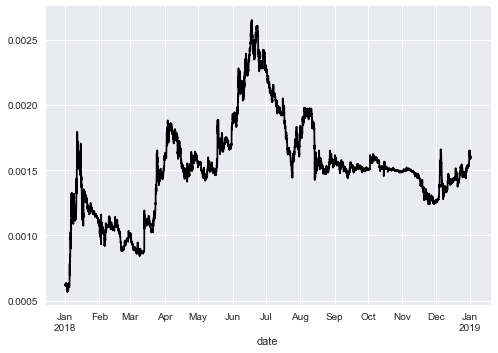

In [1357]:
binance['close'].plot(style='k')

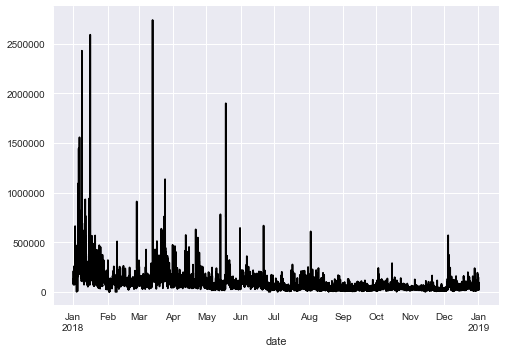

In [1171]:
binance['volume'].plot(style='k')

# Let's explore data with some charts and plots
> ## Qaurterly
> ## Monthly
> ## Weekly
> ## Daily

## Quarterly

In [1358]:

quarterly=binance.resample(rule='Q').sum()
quarterly

,open,high,low,close,volume
date,,,,,
2018-03-31,2.338970,2.367242,2.310792,2.340442,3.591420e+08
2018-06-30,3.966646,3.992531,3.938339,3.967485,2.127480e+08
2018-09-30,3.730856,3.751411,3.708020,3.730350,1.005200e+08
2018-12-31,3.194632,3.207000,3.181122,3.194912,1.009424e+08
2019-03-31,0.020911,0.020980,0.020791,0.020857,8.043509e+05


In [1521]:
#quarterly['volume'].plot.bar(figsize=(10,8))

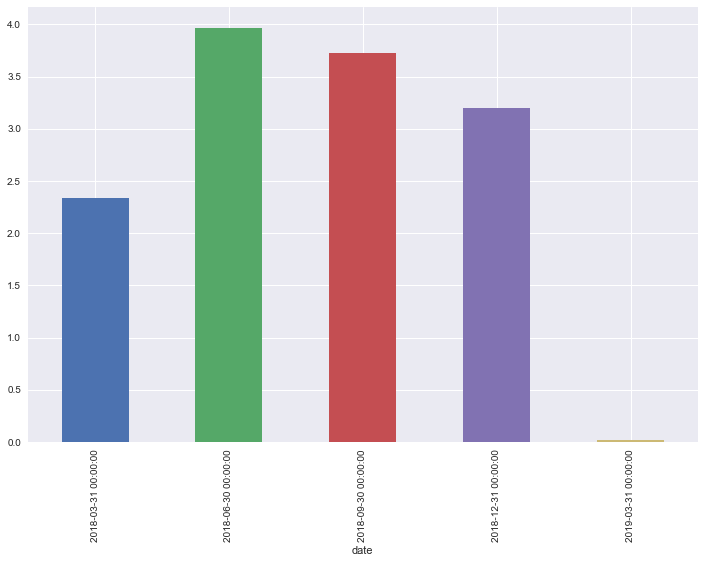

In [1360]:
#quarterly['close'].plot.bar(figsize=(12,8))

## Monthly

In [1522]:
monthly=binance.resample(rule='M').mean()

In [1523]:
monthly

,open,high,low,close,volume,binary
date,,,,,,
2018-01-31,0.001156,0.001176,0.001136,0.001157,228338.241290,0.084677
2018-02-28,0.001017,0.001026,0.001008,0.001017,97133.606295,0.000000
2018-03-31,0.001116,0.001126,0.001105,0.001117,166645.877043,0.040323
2018-04-30,0.001630,0.001641,0.001618,0.001630,113405.805792,0.773611
2018-05-31,0.001597,0.001607,0.001587,0.001598,89779.843562,0.616935
2018-06-30,0.002263,0.002279,0.002246,0.002264,89305.006083,0.984722
2018-07-31,0.001875,0.001886,0.001863,0.001874,52506.221546,0.955645
2018-08-31,0.001686,0.001696,0.001674,0.001685,49449.158965,0.780914
2018-09-30,0.001521,0.001527,0.001514,0.001521,34257.198417,0.494444


In [1525]:
#monthly['volume'].plot.bar()

In [1526]:
#monthly['close'].plot.bar()

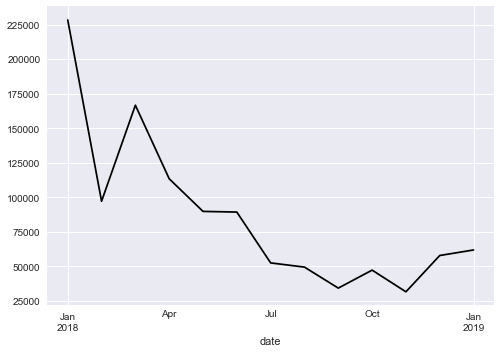

In [1365]:
monthly['volume'].plot(style='k')

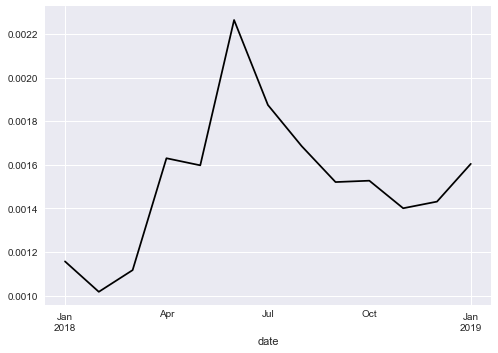

In [1366]:
monthly['close'].plot(style='k')

## Weekly

In [1367]:
weekly=binance.resample(rule='W').mean()

In [1368]:
weekly.max()

open           0.002488
high           0.002505
low            0.002469
close          0.002487
volume    316589.964226
dtype: float64

In [1527]:
#weekly['volume'].plot.bar(figsize=(10,8))

In [1528]:
#weekly['close'].plot.bar(figsize=(10,8))

In [1529]:
## In the plot above we can see the highest closing price in the last week of june

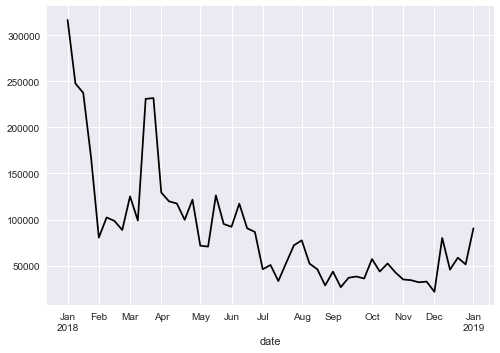

In [1530]:
weekly['volume'].plot(style='k')

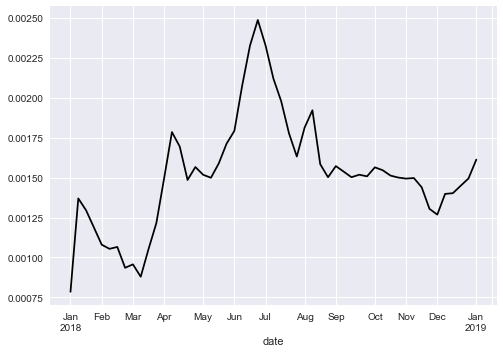

In [1531]:
weekly['close'].plot(style='k')

# Daily

In [1532]:
daily=binance.resample(rule='D').mean()

In [1533]:
daily.max()

open           0.002583
high           0.002600
low            0.002558
close          0.002580
volume    676777.370000
binary         1.000000
dtype: float64

In [1534]:
daily.min()

open         0.000586
high         0.000594
low          0.000577
close        0.000587
volume    1822.785833
binary       0.000000
dtype: float64

In [1535]:
daily.head()

,open,high,low,close,volume,binary
date,,,,,,
2018-01-01,0.000619,0.000622,0.000614,0.000619,100454.958333,0.0
2018-01-02,0.000621,0.000625,0.000609,0.000619,189758.125000,0.0
2018-01-03,0.000586,0.000594,0.000577,0.000587,154097.833333,0.0
2018-01-04,0.000615,0.000623,0.000606,0.000615,258373.916667,0.0
2018-01-05,0.000744,0.000779,0.000710,0.000756,540808.916667,0.0


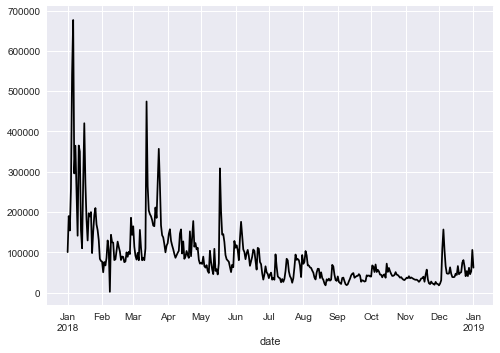

In [1378]:
daily['volume'].plot(style='k')

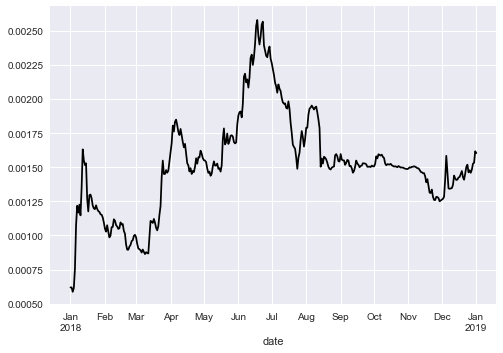

In [1379]:
daily['close'].plot(style='k')

#### Trend Exploration

In [1380]:
### Check out the rolling average

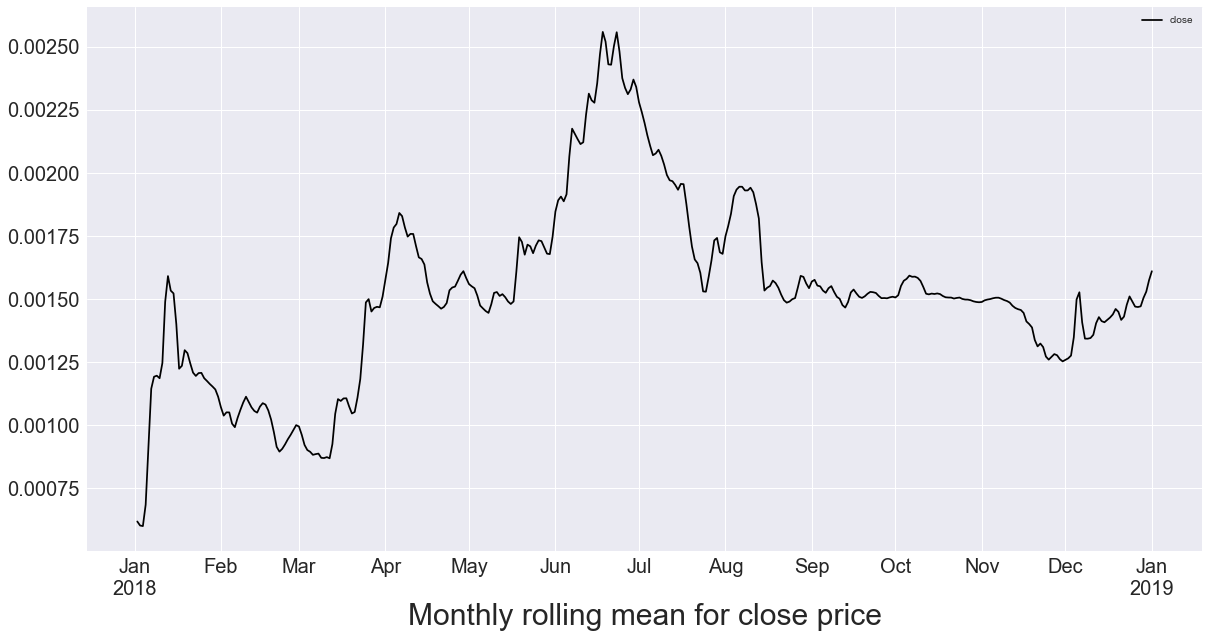

In [1381]:
closing=daily[['close']]
closing.rolling(2).mean().plot(figsize=(20,10),fontsize=20,style='k')
plt.xlabel('Monthly rolling mean for close price',fontsize=30);

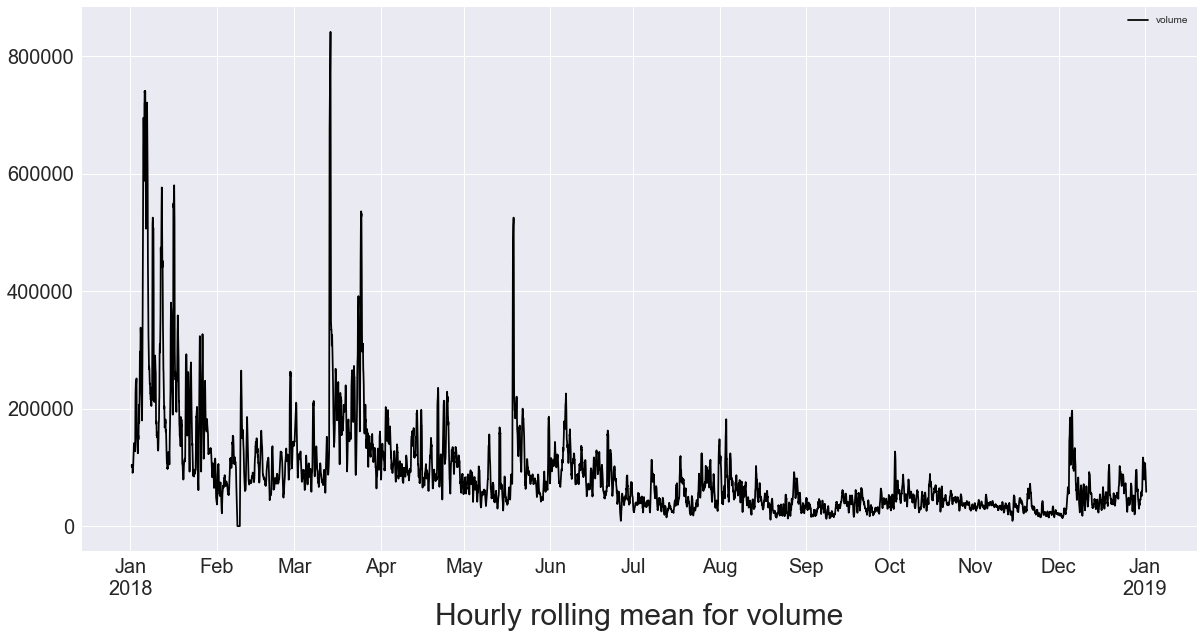

In [1382]:
volume=binance[['volume']]
volume.rolling(12).mean().plot(figsize=(20,10),fontsize=20,style='k')
plt.xlabel('Hourly rolling mean for volume',fontsize=30);

### diff() function
* default is the element in the same column
of the previous row

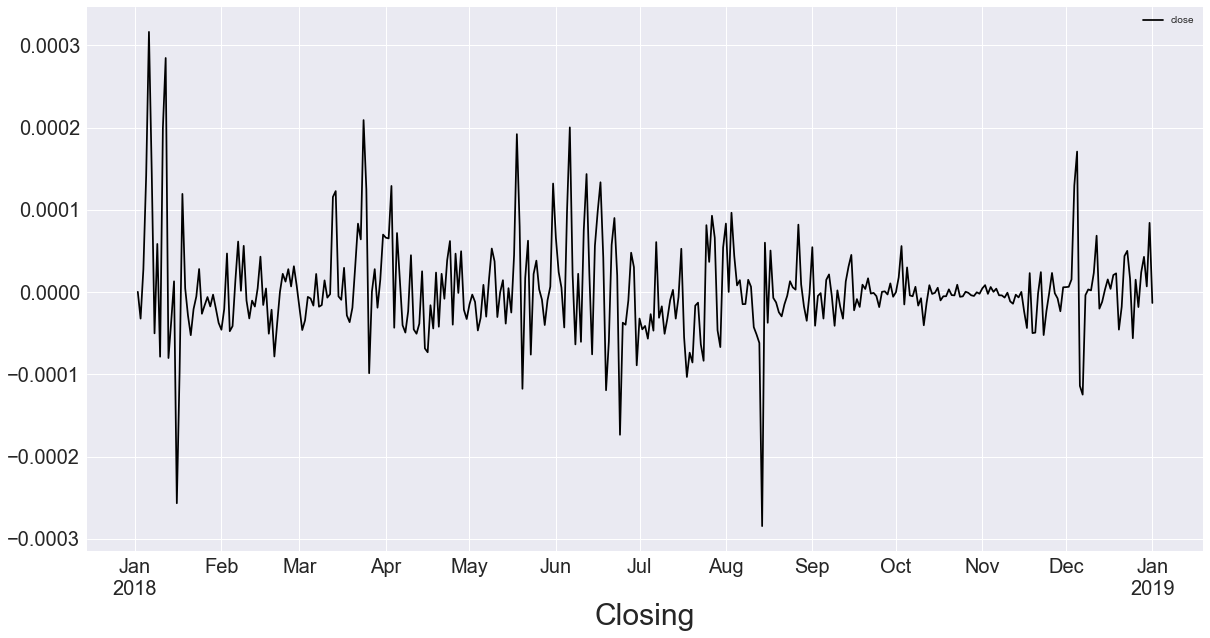

In [1536]:
closing.diff(periods=1,axis=0).plot(figsize=(20,10),fontsize=20,style='k')
plt.xlabel('Closing',fontsize=30);

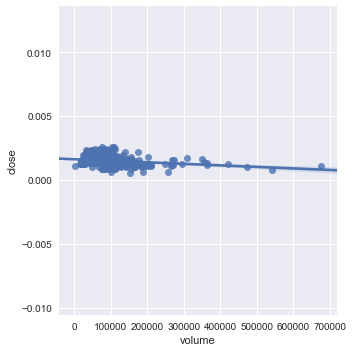

In [1538]:
sns.lmplot(x='volume',y='close',fit_reg=True,data=daily)

In [1540]:
binance.diff().corr()

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

## Autocorrelation

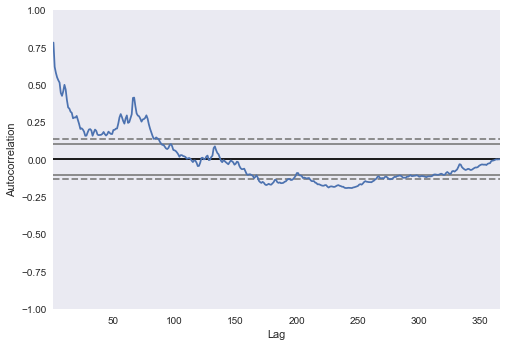

In [1541]:
pd.plotting.autocorrelation_plot(daily['volume']);

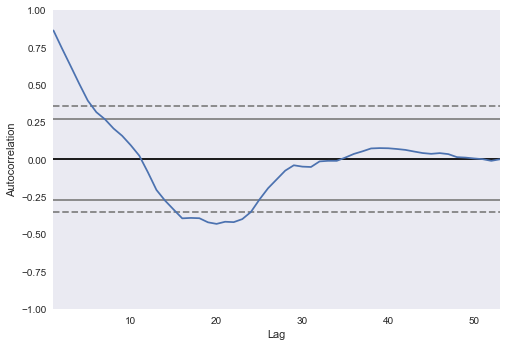

In [1542]:
pd.plotting.autocorrelation_plot(weekly['close']);

In [1543]:
c=monthly['close']
c.head(2)

date
2018-01-31    0.001157
2018-02-28    0.001017
Freq: M, Name: close, dtype: float64

In [1544]:
c.autocorr()

0.5994093179301995

In [1545]:
v=binance['volume']
v.head(2)

date
2018-01-01 00:00:00    131421.0
2018-01-01 01:00:00     91119.0
Name: volume, dtype: float64

In [1546]:
v.autocorr()

0.7548229568589389

# Phase:2  Feature engineering 
#### By design most of the features we create will be very similar to each other becuase they are derived from same underlying dataset

* ### Percent change application
* ### Moving average
* ### Daily return


## Added percent change function 

In [1547]:
binance['percent_change']=binance['close'].pct_change()*100
#binance['percent_change']=binance['percent_change'].bfill()

## Added a feature hourly return

In [1548]:
binance['hourly_return']=binance.close/binance.open-1

In [1549]:
binance

,open,high,low,close,volume,binary,percent_change,hourly_return
date,,,,,,,,
2018-01-01 00:00:00,0.000623,0.000625,0.000614,0.000618,131421.00,False,NaN,-0.007320
2018-01-01 01:00:00,0.000618,0.000625,0.000611,0.000622,91119.00,False,0.619310,0.006193
2018-01-01 02:00:00,0.000622,0.000625,0.000620,0.000622,101296.00,False,-0.059461,-0.000611
2018-01-01 03:00:00,0.000622,0.000624,0.000619,0.000622,84276.00,False,0.088440,0.000900
2018-01-01 04:00:00,0.000622,0.000628,0.000622,0.000625,103000.00,False,0.400039,0.004388
2018-01-01 05:00:00,0.000624,0.000629,0.000622,0.000626,89419.00,False,0.228826,0.003251
2018-01-01 06:00:00,0.000626,0.000629,0.000615,0.000621,102947.00,False,-0.788684,-0.007871
2018-01-01 07:00:00,0.000621,0.000628,0.000613,0.000617,209044.00,False,-0.778861,-0.007789
2018-01-01 08:00:00,0.000616,0.000625,0.000616,0.000621,73183.00,False,0.767135,0.008702


## Adding zscore by defining generalized lambda function

In [923]:
z_score=lambda x: (x - x.mean())/x.std()
binance['zscore']=binance.groupby(level='date').close.apply(z_score)


In [914]:
binance.head()

,open,high,low,close,volume,percent_change,hourly_return
date,,,,,,,
2018-01-01 00:00:00,0.000623,0.000625,0.000614,0.000618,131421.0,NaN,-0.007320
2018-01-01 01:00:00,0.000618,0.000625,0.000611,0.000622,91119.0,0.619310,0.006193
2018-01-01 02:00:00,0.000622,0.000625,0.000620,0.000622,101296.0,-0.059461,-0.000611
2018-01-01 03:00:00,0.000622,0.000624,0.000619,0.000622,84276.0,0.088440,0.000900
2018-01-01 04:00:00,0.000622,0.000628,0.000622,0.000625,103000.0,0.400039,0.004388


In [899]:
binance['percent_change'].max()

26.21861983564111

In [900]:
binance['percent_change'].min()

-10.829628386880286

#### The lowest percent_change is -10 percent

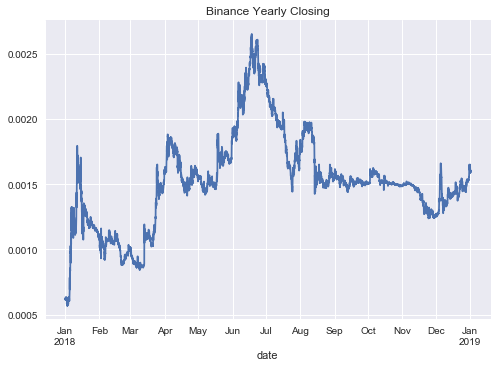

In [1550]:
binance.xs(key='close',axis=1).plot(title='Binance Yearly Closing')

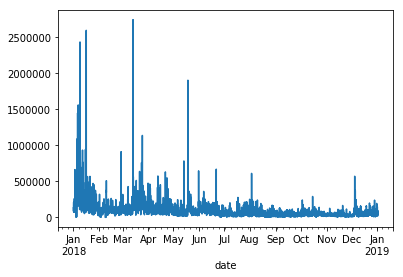

In [911]:
binance.xs(key='volume',axis=1).plot()

### Interesting : We can see few tall bar that is volume of some day 's are high let's find the amount of trade for highest volume of trade and it would also be interesting to search on internet about the news of relative prices of coin and also news

### https://www.coinspeaker.com/cryptocurrency-market-analysis-march-12-18-2018/ 
* One resources to support that the highest volume of trade was during the week 11 march 2018 when the btc price was dropping it is just pure guess though 



In [1638]:
binance['volume'].max()
pipeline.fit

KeyError: 'volume'

#### Highest trades in one hour 2740747

In [904]:
highest_volume_trades_in_a_day=binance[1704:1730]

In [905]:
a=highest_volume_trades_in_a_day['volume'].sum()
a

11841805.149999997

#### 11 Million in a day on 13Th March 2018

In [906]:
total=binance['volume'].sum()
total
## Total volume of trade

774156646.5799999

In [907]:

print("Total percentage of trade in a day ",(a/(a+total)),"")

Total percentage of trade in a day  0.015065939537076597 


#### 1.5 percent of trades in a day from 365 days of data. It would be interesting to find the correlation or causation(news | relative price index) 

In [912]:
binance.head()

,open,high,low,close,volume,percent_change,hourly_return
date,,,,,,,
2018-01-01 00:00:00,0.000623,0.000625,0.000614,0.000618,131421.0,NaN,-0.007320
2018-01-01 01:00:00,0.000618,0.000625,0.000611,0.000622,91119.0,0.619310,0.006193
2018-01-01 02:00:00,0.000622,0.000625,0.000620,0.000622,101296.0,-0.059461,-0.000611
2018-01-01 03:00:00,0.000622,0.000624,0.000619,0.000622,84276.0,0.088440,0.000900
2018-01-01 04:00:00,0.000622,0.000628,0.000622,0.000625,103000.0,0.400039,0.004388


## Moving average

In [542]:
bince.columns

Index(['time_period_start', 'price_open', 'price_high', 'price_low',
       'price_close', 'volume_traded'],
      dtype='object')

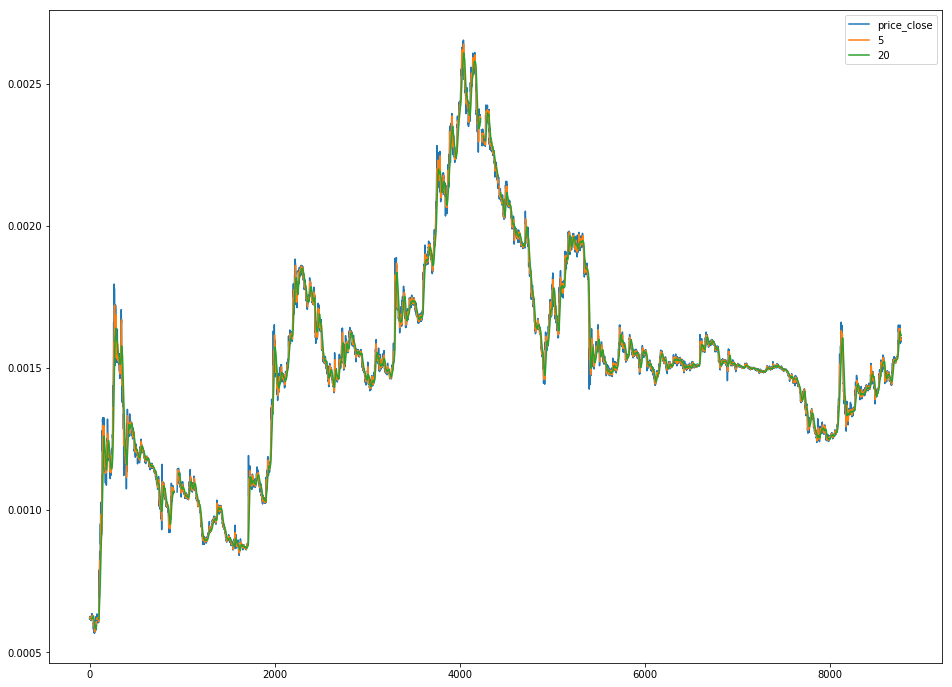

In [763]:
bince['5']=bince['price_close'].rolling(window=5).mean()
bince['20']=bince['price_close'].rolling(window=20).mean()
bince[['price_close','5','20']].plot(label='BNB',figsize=(16,12));

In [552]:
bince['hours']=range(0,len(bince.index.values))

In [983]:
bince.head()

,time_period_start,price_open,price_high,price_low,price_close,volume_traded,5,20,hours,Rolling_Mean
0,2018-01-01 00:00:00,0.000623,0.000625,0.000614,0.000618,131421.0,NaN,NaN,0,NaN
1,2018-01-01 01:00:00,0.000618,0.000625,0.000611,0.000622,91119.0,NaN,NaN,1,NaN
2,2018-01-01 02:00:00,0.000622,0.000625,0.000620,0.000622,101296.0,NaN,NaN,2,NaN
3,2018-01-01 03:00:00,0.000622,0.000624,0.000619,0.000622,84276.0,NaN,NaN,3,NaN
4,2018-01-01 04:00:00,0.000622,0.000628,0.000622,0.000625,103000.0,0.000622,NaN,4,NaN


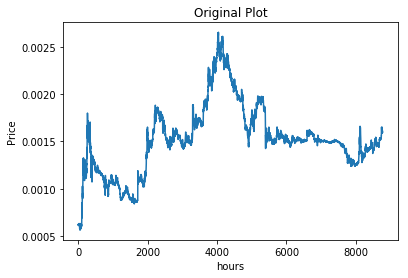

In [547]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('hours')
ax1.set_ylabel('Price')
ax1.set_title('Original Plot')
ax1.plot('hours', 'price_open', data = bince);


In [598]:
bince['Rolling_Mean'] = bince['price_open'].rolling(window = 20).mean()

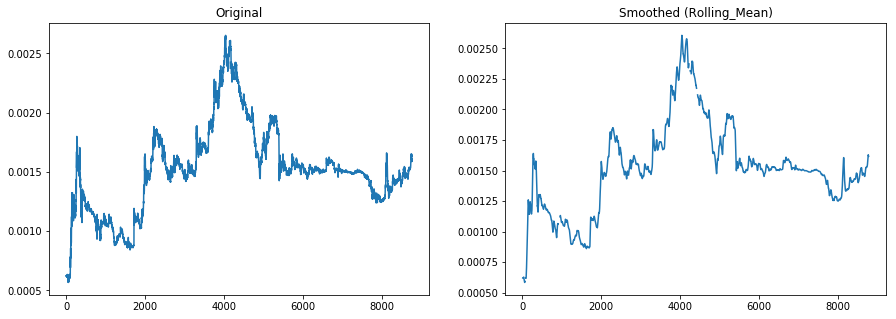

In [748]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5));
axes[0].plot('hours', 'price_open', data = bince);
axes[0].set_title('Original');
axes[1].plot('hours', 'Rolling_Mean', data = bince);
axes[1].set_title('Smoothed (Rolling_Mean)');


### Plotting original and smoothed data on same plot

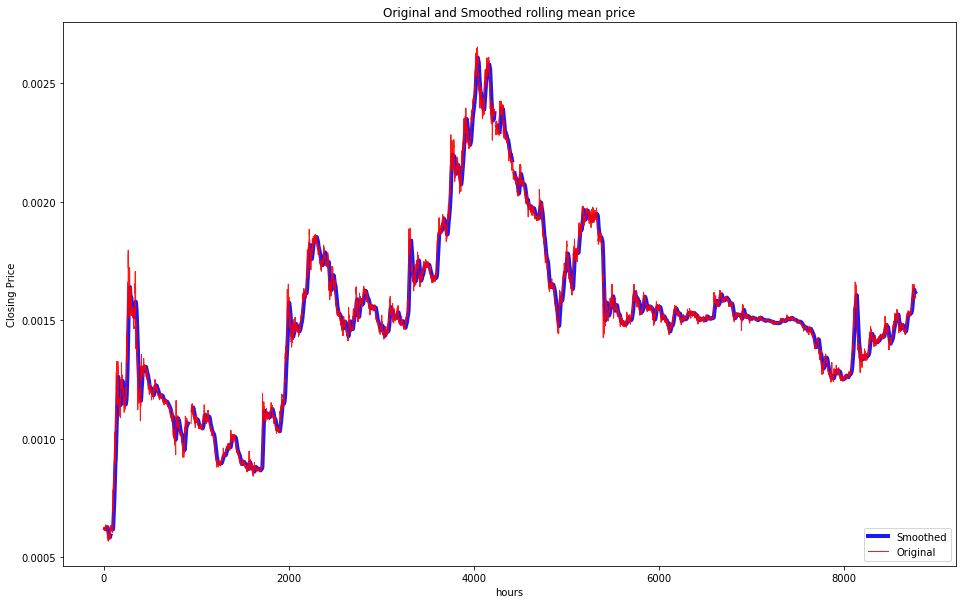

In [984]:
fig = plt.figure(figsize=(16,10));
ax = fig.add_subplot(111);
ax.plot(bince['hours'], bince['Rolling_Mean'], color = (0,0,1), linewidth = 4, alpha = .9, label = 'Smoothed');
ax.plot(bince['hours'], bince['price_close'], color = (1,0,0),linewidth=1,alpha=.9, label = 'Original');
ax.set_title('Original and Smoothed rolling mean price')
ax.set_xlabel('hours')
ax.set_ylabel('Closing Price')
ax.legend(loc='lower right');
plt.savefig('together.png')


## Check the price of binance coin during March 13 week of it fell or rise. Relative to other coins 
* To do this week 20/03.2019
* -tsfresh: 20 March 
* ? understanding implementing
* -feature engineering:21 March 
* ?check if it is feasible
* -PCA: random forest: 21 March
* Model:
* ?splitting data
* ?logistic regression

### Let's understand tsfresh package
* https://github.com/blue-yonder/tsfresh
* Time series feature extractionbased on scalable hyptohesis test
* Package contains many feature extraction methods and a robust feature selection algorithm 
* Feature engineering simplification or boosting up the speed and results with robustness of the package
* Automatically extraction of 100's of features and that features explain 's charactersistics of timeseries such as number of peaks, the average or more complex features such as time reversal symmetry statistic
## From Paper : https://arxiv.org/abs/1610.07717
* In built fitlering procedure 
* Highly scalable, Non-parametric hypothesis tests.
* For Binary classification problems of the UCR time series, for production, optimization  and simulated stochasitc process

# Important points to note while implementing tsfresh
> ##### _None of the columns should have infinity nan or -inf value
> ##### id requires multiple data points analogy of robot example having multiple instances: In our dataset we can replicate by removing the time from the date column for comparable and feature extraction process

### One week of data can tell you whether next week 

### Importing tsfresh 

In [1303]:
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_selection import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters, MinimalFCParameters, settings


## I would like to remove hour from the index date column as it doesn't make sense to find the mean median or extract any value from itself with help of tsfresh 




In [1551]:
binance.index=binance.index.floor('H')

In [ ]:
def conc():
    

In [1552]:
binanceshift, y = make_forecasting_frame(binance["high"], kind="price", max_timeshift=20, rolling_direction=1)

In [1317]:
%%time
%%capture process
X = extract_features(binanceshift, column_id="id", column_sort="time", column_value="value", impute_function=impute,
                     show_warnings=False)

CPU times: user 2.95 s, sys: 750 ms, total: 3.7 s
Wall time: 2min 58s


In [1324]:
X.shape

(366, 794)

In [1329]:
X

variable,value__abs_energy,value__absolute_sum_of_changes,"value__agg_autocorrelation__f_agg_""mean""__maxlag_40","value__agg_autocorrelation__f_agg_""median""__maxlag_40","value__agg_autocorrelation__f_agg_""var""__maxlag_40","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","value__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,value__symmetry_looking__r_0.9,value__symmetry_looking__r_0.9500000000000001,value__time_reversal_asymmetry_statistic__lag_1,value__time_reversal_asymmetry_statistic__lag_2,value__time_reversal_asymmetry_statistic__lag_3,value__value_count__value_-1,value__value_count__value_0,value__value_count__value_1,value__variance,value__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0.000113,0.001122,0.000000,0.000000,0.000000,0.000632,-0.403413,-1.694082e-07,7.261657e-08,0.000632,...,1.0,1.0,-1.702251e-14,1.873247e-14,2.349190e-14,0.0,0.0,0.0,2.631489e-11,0.0
2018-01-02,0.000196,0.002394,0.000000,0.000000,0.000000,0.000627,0.673130,1.461303e-07,2.293486e-08,0.000629,...,1.0,1.0,2.517556e-14,6.520983e-14,1.153127e-13,0.0,0.0,0.0,6.273596e-11,0.0
2018-01-03,0.000188,0.004285,0.596159,0.589365,0.001153,0.000641,-0.475654,-4.976579e-07,1.314748e-07,0.000644,...,1.0,1.0,-1.019937e-13,-2.032578e-13,-2.669583e-13,0.0,0.0,0.0,3.328836e-10,0.0
2018-01-04,0.000184,0.004282,0.751230,0.752187,0.002998,0.000598,0.817394,9.800096e-07,9.969187e-08,0.000603,...,1.0,1.0,7.571871e-14,1.566952e-13,2.245617e-13,0.0,0.0,0.0,3.957806e-10,0.0
2018-01-05,0.000279,0.021245,0.631099,0.601587,0.006669,0.000610,0.812376,9.370043e-06,9.810804e-07,0.000665,...,1.0,1.0,-2.047876e-14,-2.292465e-13,-2.925352e-13,0.0,0.0,0.0,1.550397e-08,0.0
2018-01-06,0.000519,0.045230,0.706623,0.692600,0.004538,0.000859,0.656595,1.157247e-05,1.899077e-06,0.001011,...,1.0,1.0,9.469159e-13,1.176817e-12,2.147440e-12,0.0,0.0,0.0,6.905770e-08,0.0
2018-01-07,0.000684,0.025351,0.610062,0.585324,0.005062,0.001186,0.404236,3.178251e-06,1.027334e-06,0.001277,...,1.0,1.0,1.029950e-12,-9.700951e-13,-9.627038e-13,0.0,0.0,0.0,1.754026e-08,0.0
2018-01-08,0.000775,0.017462,0.471549,0.460423,0.003374,0.001367,-0.843620,-3.009267e-06,2.736159e-07,0.001377,...,1.0,1.0,-1.293751e-13,-1.203256e-12,-2.679735e-12,0.0,0.0,0.0,3.462952e-09,0.0
2018-01-09,0.000736,0.012830,0.446749,0.445506,0.013552,0.001209,0.642337,1.851113e-06,3.155297e-07,0.001235,...,1.0,1.0,5.910883e-13,6.372283e-13,1.575669e-12,0.0,0.0,0.0,1.821001e-09,0.0


#### Function to find the column with constant value 

In [1319]:
%%time
const_cols = [c for c in X.columns if X[c].nunique(dropna=False)==1 ]

CPU times: user 135 ms, sys: 6.92 ms, total: 142 ms
Wall time: 141 ms


In [1331]:
y.shape

(88,)

In [1321]:
len(const_cols)

84

In [ ]:
## Previous 

In [1272]:
len(const_cols)

445

In [1273]:
X.shape

(8757, 794)

In [1266]:
train=X.drop(const_cols,axis=1)

445

In [1283]:
train.shape

(8757, 349)

In [1385]:
binance.shape

(8773, 5)

#### We have 349 columns left from 794  after deleting all the constant columns

In [ ]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'id': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])

In [1387]:
Weekl=binance.resample('W')

NameError: name 'weekl' is not defined

In [1398]:
binance

,time_period_start,price_open,price_high,price_low,price_close,volume_traded
0,1/1/18 0:00,0.000623,0.000625,0.000614,0.000618,131421.00
1,1/1/18 1:00,0.000618,0.000625,0.000611,0.000622,91119.00
2,1/1/18 2:00,0.000622,0.000625,0.000620,0.000622,101296.00
3,1/1/18 3:00,0.000622,0.000624,0.000619,0.000622,84276.00
4,1/1/18 4:00,0.000622,0.000628,0.000622,0.000625,103000.00
5,1/1/18 5:00,0.000624,0.000629,0.000622,0.000626,89419.00
6,1/1/18 6:00,0.000626,0.000629,0.000615,0.000621,102947.00
7,1/1/18 7:00,0.000621,0.000628,0.000613,0.000617,209044.00
8,1/1/18 8:00,0.000616,0.000625,0.000616,0.000621,73183.00
9,1/1/18 9:00,0.000620,0.000622,0.000616,0.000620,72248.00


## Inspiration from:
https://github.com/huseinzol05/Stock-Prediction-Models/blob/master/agent/evolution-strategy-bayesian-agent.ipynb



# Error In The plot

f, ax1=plt.subplots(1,1,sharex=True,sharey=True,figsize=(16,12))
ax1.plot(binance['volume'],'r')
ax1.set_title('**Binance** Stock price of Year 2018')
ax1.text(x=2000,y=25,s='260% Change in one hour', fontsize= 15)
ax1.axhline(y=0,color='black',linewidth=1.3,alpha=0.8)
f.savefig("Binance.png")

f, ax1=plt.subplots(1,1,sharex=True,sharey=True,figsize=(12,9))
ax1.plot(binance['percent_change'],'r')
ax1.set_title('**Binance** Stock price of Year 2018')
ax1.text(x=2000,y=25,s='260% Change in one hour', fontsize= 15)
ax1.axhline(y=0,color='black',linewidth=1.3,alpha=0.8)
f.savefig("Binance.png")

## Reference

> #### Adding hours column
> #### https://github.com/blue-yonder/tsfresh/blob/master/notebooks/timeseries_forecasting_google_stock.ipynb 
> ### https://github.com/mGalarnyk/Python_Tutorials/blob/master/Time_Series/Part1_Time_Series_Data_BasicPlotting.ipynb
> #### Moving average
* https://byteacademy.co/blog/time-series-python
> #### Models
* https://github.com/blue-yonder/tsfresh/tree/master/notebooks
> #### Look ahead bias 
* https://medium.com/apteo/avoid-time-loops-with-cross-validation-aa595318543e
> #### Walk Forward Validation
* https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/

In [1396]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [1397]:
timeseries

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
5,1,5,-1,-1,63,-3,-1,0
6,1,6,-1,-1,63,-3,0,0
7,1,7,-1,-1,63,-3,-1,0
8,1,8,-1,-1,63,-3,-1,0
9,1,9,-1,-1,61,-3,0,0


## tsfresh robot execution failure implementation with relevant feature augmn